In [ ]:
import snntorch as snn
import torch
import torch.nn as nn
from snntorch import spikeplot as splt
from torch.utils.data import DataLoader
# from torchvision import datasets, transforms
import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import utils.network
import torch.optim as optim
import os
from PIL import Image
import torchvision.transforms.functional as TF
import cv2
import pandas as pd
import time
import utils.data as dt


# os.environ["CUDA_LAUNCH_BLOCKING"] = "1" # for debugging on GPU
%load_ext autoreload
%autoreload 2
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# Debugging
## Checking the old dataset is still working

In [2]:
dataset_folder = 'cropped_classical_tracking_dataset'
csv_path = os.path.join(dataset_folder, 'labels.csv')
image_dir = os.path.join(dataset_folder, 'frames')
quantization = 8
label_quantization = 8
trainratio, testratio, valratio = 0.9, 0.05, 0.05
labels = ['X', 'Y', 'Radius'] 
trainset = dt.Tracking3DVideoDataset(csv_path, image_dir, split='train', dataset_type="ball", augment=False, quantization=quantization, label_quantization=label_quantization, train_ratio=trainratio, test_ratio=testratio, val_ratio=valratio, labels=labels)
trainloader = DataLoader(trainset, batch_size=3, collate_fn=trainset.collate_fn, shuffle=True)
testset = dt.BallTrackingDatasetVarLenVideos(csv_path, image_dir, split='test', dataset_type="ball", augment=False, quantization=quantization, label_quantization=label_quantization, train_ratio=trainratio, test_ratio=testratio, val_ratio=valratio, labels=labels) 
testloader = DataLoader(testset, batch_size=3, collate_fn=testset.collate_fn, shuffle=False)
valset = dt.BallTrackingDatasetVarLenVideos(csv_path, image_dir, split='val', dataset_type="ball", augment=False, quantization=quantization, label_quantization=label_quantization, train_ratio=trainratio, test_ratio=testratio, val_ratio=valratio, labels=labels)
validationloader = DataLoader(valset, batch_size=3, collate_fn=valset.collate_fn, shuffle=False)

Loading dataset from cropped_classical_tracking_dataset\labels.csv with accumulation time cropped_classical_tracking_dataset\framesms


FileNotFoundError: [Errno 2] No such file or directory: 'cropped_classical_tracking_dataset\\labels.csv\\positions_cropped_classical_tracking_dataset\\framesms.csv'

In [51]:
model = network.SCNNVideoClassification(trainset).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
model.start_training(trainloader, optimizer, device, validationloader=testloader, num_steps=10, num_epochs=30, chunk_size=10)

Flattened feature size: 3840
Number of X bins: 86
Number of Y bins: 52
Number of Radius bins: 101
Evaluating video classification tracker
All errors 3
Average Error for X: 50.8652 pixels
Average Error for Y: 4.3759 pixels
Average Error for Radius: 0.6596 pixels
Epoch 1/30, Loss: 0.5852, Validation Error: 51.0574 pixels
Evaluating video classification tracker
All errors 3
Average Error for X: 50.8652 pixels
Average Error for Y: 3.9291 pixels
Average Error for Radius: 0.6596 pixels
Epoch 2/30, Loss: 0.5708, Validation Error: 51.0210 pixels
Evaluating video classification tracker
All errors 3
Average Error for X: 50.8652 pixels
Average Error for Y: 3.9291 pixels
Average Error for Radius: 0.6596 pixels
Epoch 3/30, Loss: 0.6120, Validation Error: 51.0210 pixels
Evaluating video classification tracker
All errors 3
Average Error for X: 50.9291 pixels
Average Error for Y: 3.8227 pixels
Average Error for Radius: 0.6596 pixels
Epoch 4/30, Loss: 0.5975, Validation Error: 51.0766 pixels
Evaluating

KeyboardInterrupt: 

In [ ]:
video1, label1, length1 = testset.__getitem__(0)
preds1 = dt.get_preds_video_classification(model, video1, length1, trainset.labels, device, num_steps=12)
gen1 = dt.image_gen_for_video(video1, label1, preds1)


torch.Size([1, 86, 75])
torch.Size([1, 75])
torch.Size([1, 52, 75])
torch.Size([1, 75])
torch.Size([1, 101, 75])
torch.Size([1, 75])
(3, 75)


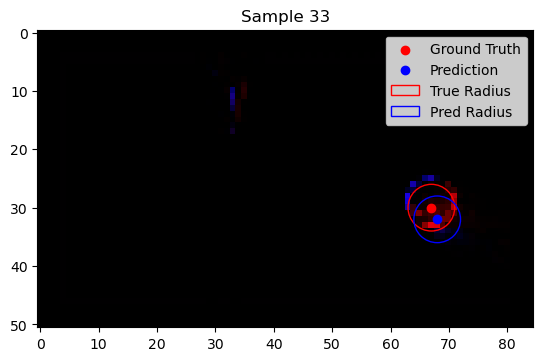

In [ ]:
dt.show_next_img_w_pred(gen1)

Old dataset is working with the current network, so the bug is not in there. The data has to be the problem

# Data Comparison

In [ ]:
# Dataset in-fov
dataset_path = 'dataset_python_sim'
accumulation_time = 10 # ms
quantization = 8
batch_size = 4
dataset_type = "all"
new_positions_csv = f'dataset_python_sim/positions_in_fov_{accumulation_time}ms.csv'
trainset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, positions_csv=new_positions_csv, quantization = quantization, split='train', dataset_type=dataset_type)
testset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, positions_csv=new_positions_csv, quantization = quantization, split='test', dataset_type=dataset_type)
validationset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, positions_csv=new_positions_csv, quantization = quantization, split='val', dataset_type=dataset_type)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0, collate_fn=trainset.collate_fn)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=testset.collate_fn)
valid_loader = DataLoader(validationset, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=validationset.collate_fn)

Loaded 20632 rows from dataset_python_sim/positions_in_fov_10ms.csv
Found 156 sequences in dataset_python_sim/positions_in_fov_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Label shape: None
Split sizes: train=54, val=11, test=13, total=78
Final dataset split='train' size: 54
Loaded 20632 rows from dataset_python_sim/positions_in_fov_10ms.csv
Found 156 sequences in dataset_python_sim/positions_in_fov_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Label shape: None
Split sizes: train=54, val=11, test=13, total=78
Final dataset split='test' size: 13
Loaded 20632 rows from dataset_python_sim/positions_in_fov_10ms.csv
Found 156 sequences in dataset_python_sim/positions_in_fov_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Label shape: None
Split sizes: train=54, val=11, test=13, total=78
Final dataset split='val' size: 11


In [ ]:
video1, label1, length1 = testset.__getitem__(1)
gen1 = dt.image_gen_for_video(video1, label1)

video2, label2, length2 = testset.__getitem__(2)
gen2 = dt.image_gen_for_video(video2, label2)

90 160
max tensor(0.)
min tensor(0.)


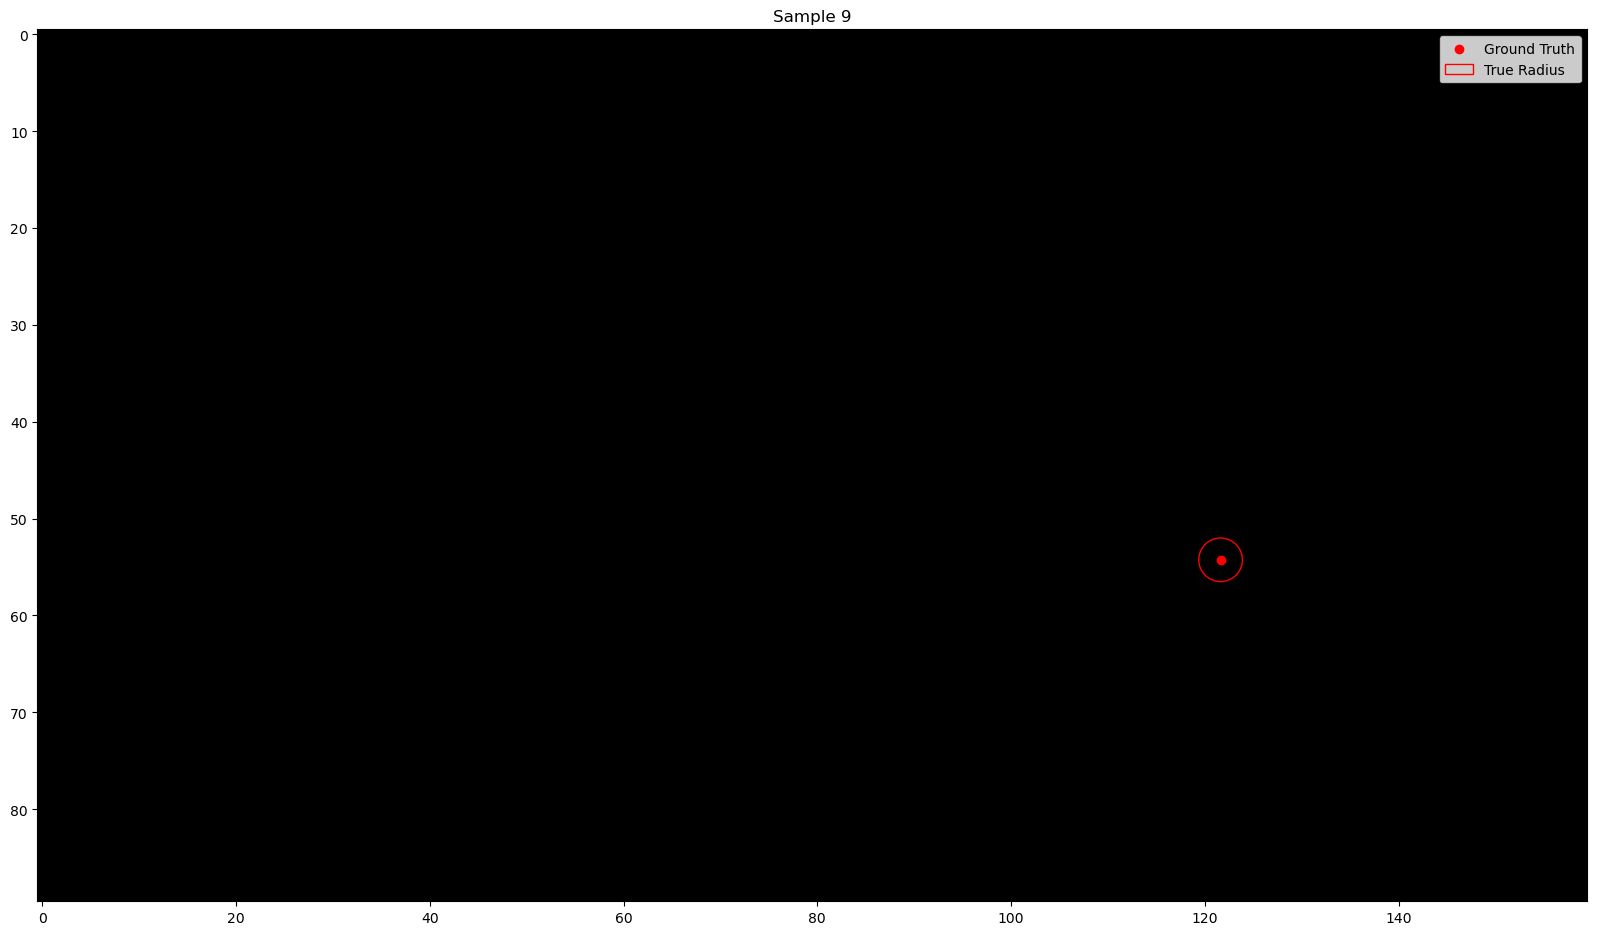

In [349]:
# dt.show_next_img(gen1)
dt.show_next_img(gen2)

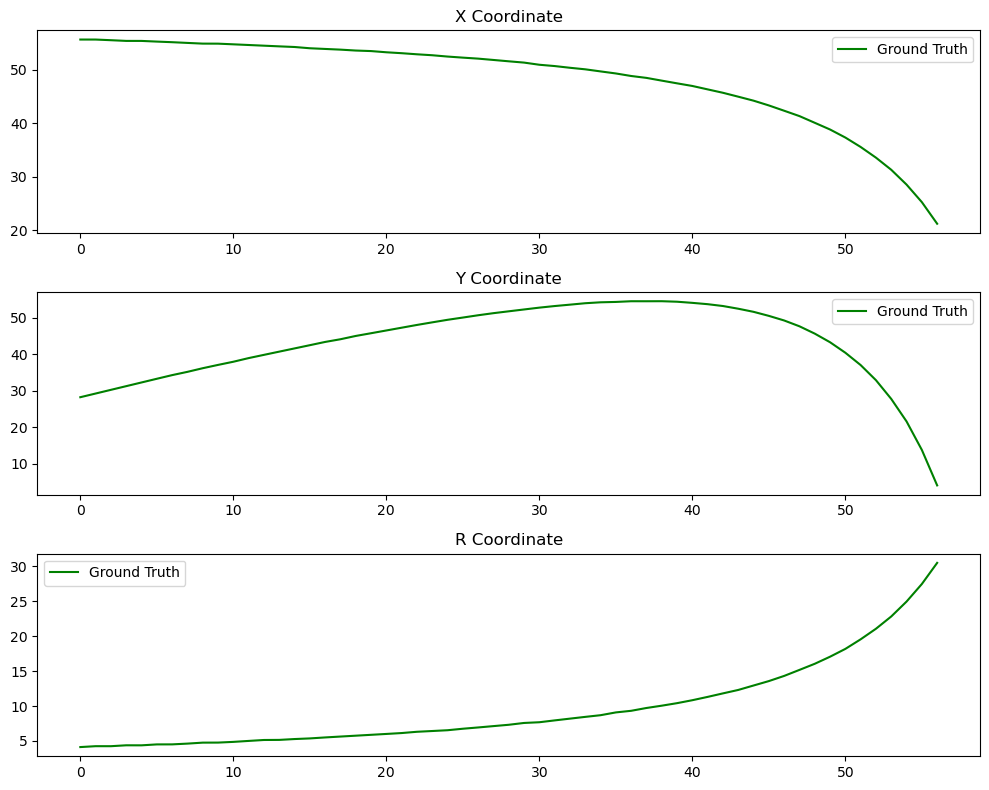

In [294]:
fig, axs = plt.subplots(3, 1, figsize=(10, 8))
for i, label in enumerate(['X', 'Y', 'R']):
    axs[i].plot(label2[:, i], label='Ground Truth', color='green')
    axs[i].set_title(f'{label} Coordinate')
    axs[i].legend()
plt.tight_layout()
plt.show()

Data seems fine, but some of the rolls are too slow, thus creating too few events. 

Also, graph for quantization 8 had steps. I fixed the dataset class so it doesnt round.

Im doing two things

1. Training only on throws

If this works:

2. Creating a new dataset increasing the sensitivity and the minimum velocity for the ball

## Training only on throws in-fov

In [ ]:
# Dataset in-fov
dataset_path = 'dataset_python_sim'
accumulation_time = 10 # ms
quantization = 8
batch_size = 4
dataset_type = "throws"
new_positions_csv = f'dataset_python_sim/positions_in_fov_{accumulation_time}ms.csv'
trainset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, positions_csv=new_positions_csv, quantization = quantization, split='train', dataset_type=dataset_type)
testset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, positions_csv=new_positions_csv, quantization = quantization, split='test', dataset_type=dataset_type)
validationset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, positions_csv=new_positions_csv, quantization = quantization, split='val', dataset_type=dataset_type)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0, collate_fn=trainset.collate_fn)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=testset.collate_fn)
valid_loader = DataLoader(validationset, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=validationset.collate_fn)

Loaded 20632 rows from dataset_python_sim/positions_in_fov_10ms.csv
Found 156 sequences in dataset_python_sim/positions_in_fov_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Label shape: None
Split sizes: train=54, val=11, test=13, total=78
Final dataset split='train' size: 54
Loaded 20632 rows from dataset_python_sim/positions_in_fov_10ms.csv
Found 156 sequences in dataset_python_sim/positions_in_fov_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Label shape: None
Split sizes: train=54, val=11, test=13, total=78
Final dataset split='test' size: 13
Loaded 20632 rows from dataset_python_sim/positions_in_fov_10ms.csv
Found 156 sequences in dataset_python_sim/positions_in_fov_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Label shape: None
Split sizes: train=54, val=11, test=13, total=78
Final dataset split='val' size: 11


Flattened feature size: 14080
Evaluating video regression tracker
Average Error for x_cam: 36.2041 pixels
Average Error for y_cam: 36.2041 pixels
Average Error for R_cam: 36.2041 pixels
Epoch 1/50, Loss: 130.3994, Validation Error: 62.7073 pixels
Evaluating video regression tracker
Average Error for x_cam: 37.0151 pixels
Average Error for y_cam: 37.0151 pixels
Average Error for R_cam: 37.0151 pixels
Epoch 2/50, Loss: 150.5652, Validation Error: 64.1120 pixels
Evaluating video regression tracker
Average Error for x_cam: 37.1126 pixels
Average Error for y_cam: 37.1126 pixels
Average Error for R_cam: 37.1126 pixels
Epoch 3/50, Loss: 113.6269, Validation Error: 64.2808 pixels
Evaluating video regression tracker
Average Error for x_cam: 32.6976 pixels
Average Error for y_cam: 32.6976 pixels
Average Error for R_cam: 32.6976 pixels
Epoch 4/50, Loss: 90.8399, Validation Error: 56.6339 pixels
Evaluating video regression tracker
Average Error for x_cam: 26.6333 pixels
Average Error for y_cam: 26

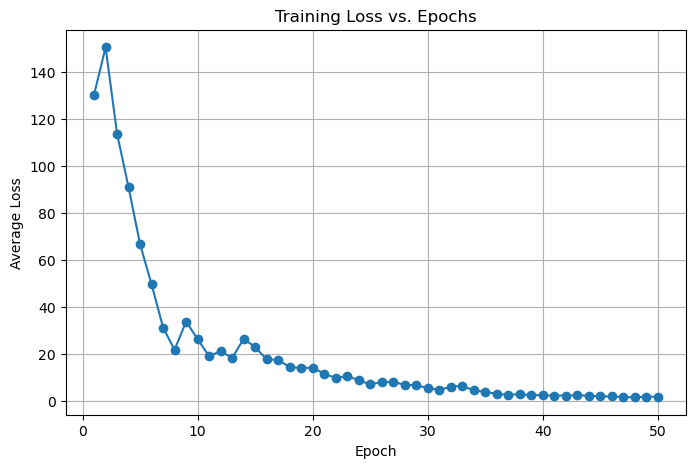

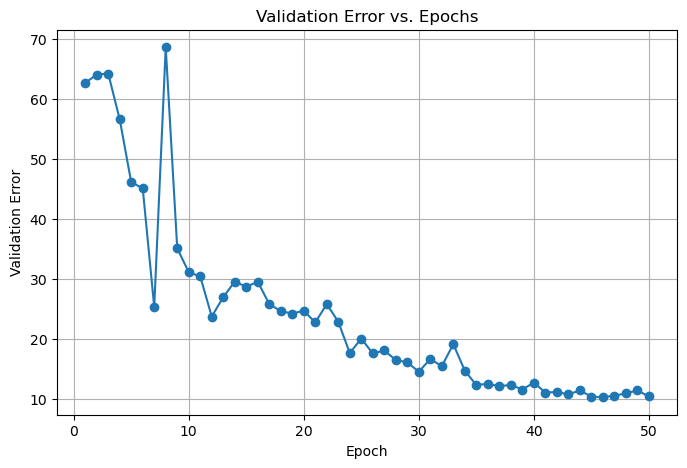

Model saved at models/VideoRegression_q8_10ts_50e.pt


In [ ]:
model = network.SCNNVideoRegression(trainset).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = network.regression_loss
model.start_training(trainloader, optimizer, device, loss_function=loss_fn, validationloader=valid_loader, num_steps=10, num_epochs=50, chunk_size=40)
network.save_model(model)

In [456]:
network.save_model(model)

Model saved at models/VideoClassification_q8_10ts_50e.pt


In [ ]:
error = model.evaluate(trainloader, device, num_steps=10, print_results=True)

Evaluating video classification tracker
All errors 3
Average Error for x_cam: 0.0056 pixels
Average Error for y_cam: 0.0086 pixels
Average Error for R_cam: 0.0511 pixels


In [ ]:
video, label, length = validationset.__getitem__(0)
preds = dt.get_preds_video_classification(model, video, length, trainset.labels, device, num_steps=10)
gen = dt.image_gen_for_video(video, label, preds)


torch.Size([1, 161, 61])
torch.Size([1, 61])
torch.Size([1, 91, 61])
torch.Size([1, 61])
torch.Size([1, 101, 61])
torch.Size([1, 61])
(3, 61)


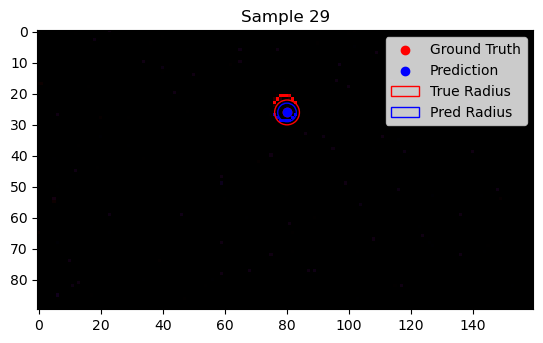

In [455]:
dt.show_next_img_w_pred(gen)

## Now Ill try with confidence

In [ ]:
# Dataset in-fov
dataset_path = 'dataset_python_sim'
accumulation_time = 10 # ms
quantization = 8
batch_size = 4
dataset_type = "throws"
labels = ['x_cam', 'y_cam', 'R_cam', 'in_fov']
trainset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, quantization = quantization, split='train', dataset_type=dataset_type, labels=labels)
testset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, quantization = quantization, split='test', dataset_type=dataset_type, labels=labels)
validationset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, quantization = quantization, split='val', dataset_type=dataset_type, labels=labels)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0, collate_fn=trainset.collate_fn)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=testset.collate_fn)
valid_loader = DataLoader(validationset, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=validationset.collate_fn)

Loaded 21531 rows from dataset_python_sim\positions_10ms.csv
Found 156 sequences in dataset_python_sim\positions_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Label shape: None
Split sizes: train=54, val=11, test=13, total=78
Final dataset split='train' size: 54
Loaded 21531 rows from dataset_python_sim\positions_10ms.csv
Found 156 sequences in dataset_python_sim\positions_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Label shape: None
Split sizes: train=54, val=11, test=13, total=78
Final dataset split='test' size: 13
Loaded 21531 rows from dataset_python_sim\positions_10ms.csv
Found 156 sequences in dataset_python_sim\positions_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Label shape: None
Split sizes: train=54, val=11, test=13, total=78
Final dataset split='val' size: 11


Flattened feature size: 14080
Number of x_cam bins: 161
Number of y_cam bins: 91
Number of R_cam bins: 101
Number of in_fov bins: 1
Evaluating video classification tracker
Average Error for x_cam: 42.6910 pixels
Average Error for y_cam: 15.5324 pixels
Average Error for R_cam: 2.9478 pixels
Average Error for in_fov: 0.9708 pixels
Epoch 1/30, Loss: 1.0348, Validation Error: 45.5347 pixels
Evaluating video classification tracker
Average Error for x_cam: 42.6910 pixels
Average Error for y_cam: 15.5324 pixels
Average Error for R_cam: 2.9478 pixels
Average Error for in_fov: 0.9708 pixels
Epoch 2/30, Loss: 1.0262, Validation Error: 45.5347 pixels
Evaluating video classification tracker
Average Error for x_cam: 42.6910 pixels
Average Error for y_cam: 15.5324 pixels
Average Error for R_cam: 2.9478 pixels
Average Error for in_fov: 0.9708 pixels
Epoch 3/30, Loss: 1.0709, Validation Error: 45.5347 pixels
Evaluating video classification tracker
Average Error for x_cam: 53.4906 pixels
Average Error 

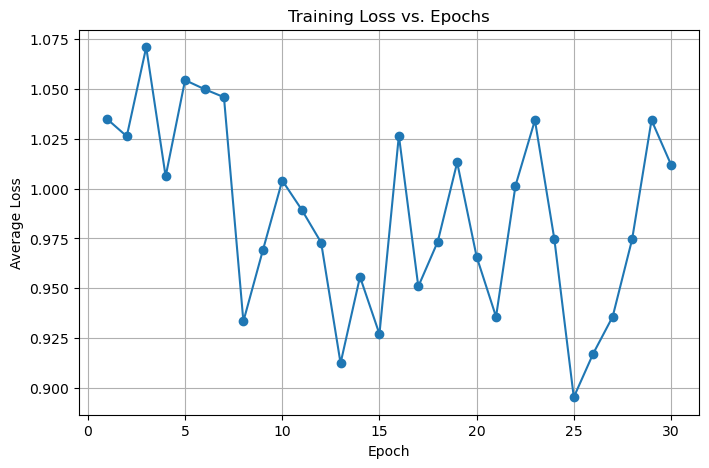

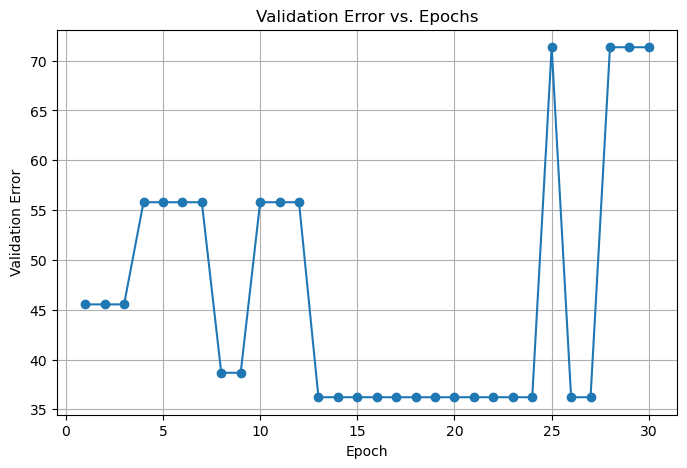

In [18]:
model = network.SCNNVideoClassification(trainset).to(device)
base_lr = 1e-3                       # LR for “regular” weights
conf_lr = 5 * base_lr                # LR for the confidence head

# 1. Collect the parameters of the confidence head
conf_params   = list(model.fc_layers['in_fov'].parameters())

# 2. Everything else goes in another group
other_params  = [p for n, p in model.named_parameters()
                 if not n.startswith('fc_layers.in_fov')]

# 3. Create the optimizer with two groups
optimizer = torch.optim.Adam(
    [
        {'params': other_params, 'lr': base_lr},
        {'params': conf_params,  'lr': conf_lr},
    ],
    weight_decay=1e-5               # applies to *both* groups unless overridden
)
loss_fn = network.classification_loss_w_confidence
model.start_training(trainloader, optimizer, device, loss_function=loss_fn, validationloader=valid_loader, num_steps=1, num_epochs=30, chunk_size=40)

In [28]:
def freeze_all_except_given(model, layer_name):
    for name, param in model.named_parameters():
        param.requires_grad = name.startswith(f"fc_layers.{layer_name}")

def freeze_given(model, layer_name):
    for name, param in model.named_parameters():
        if name.startswith(f"fc_layers.{layer_name}"):
            param.requires_grad = False
        else:
            param.requires_grad = True

In [ ]:
model = network.SCNNVideoClassification(trainset).to(device)
base_lr = 1e-3                       # LR for “regular” weights
conf_lr = 5 * base_lr                # LR for the confidence head

layer_name = 'in_fov'  # specify the layer you want to freeze
# 1. Collect the parameters of the confidence head
conf_params   = list(model.fc_layers[layer_name].parameters())

# 2. Everything else goes in another group
other_params  = [p for n, p in model.named_parameters()
                 if not n.startswith('fc_layers.in_fov')]

freeze_given(model, layer_name)


# 3. Create the optimizer with two groups
optimizer = torch.optim.Adam(
    other_params,
    lr=1e-4,           # adjust if your base LR is different
    weight_decay=0.0   # usually not needed for 1-layer heads
)
loss_fn = network.classification_loss_w_confidence
model.start_training(trainloader, optimizer, device, loss_function=loss_fn, validationloader=valid_loader, num_steps=1, num_epochs=20, chunk_size=40)

print("Starting training of frozen layer:", layer_name)

freeze_all_except_given(model, layer_name)
optimizer = optim.Adam(conf_params, lr=5e-4)
model.start_training(trainloader, optimizer, device, loss_function=loss_fn, validationloader=valid_loader, num_steps=1, num_epochs=20, chunk_size=40)

Flattened feature size: 14080
Number of x_cam bins: 161
Number of y_cam bins: 91
Number of R_cam bins: 101
Number of in_fov bins: 1
Evaluating video classification tracker
Average Error for x_cam: 80.2965 pixels
Average Error for y_cam: 15.3653 pixels
Average Error for R_cam: 60.8017 pixels
Average Error for in_fov: 0.9708 pixels
Epoch 1/30, Loss: 1.0687, Validation Error: 101.8892 pixels
Evaluating video classification tracker
Average Error for x_cam: 80.2965 pixels
Average Error for y_cam: 15.3653 pixels
Average Error for R_cam: 60.8017 pixels
Average Error for in_fov: 0.9708 pixels
Epoch 2/30, Loss: 1.0560, Validation Error: 101.8892 pixels


KeyboardInterrupt: 

Things to try

- PINN loss with just the parabolic part
- Confidence
- Fix error distribution function
- Trained model with KF


## Pinn loss on trained model

In [ ]:
model = network.load_model('models/VideoClassification_q8_10ts_50e.pt', network.SCNNVideoClassification, trainset, device)

c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\network.py:1809: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)


Loading model with weighted average: False
Flattened feature size: 14080
Number of x_cam bins: 161
Number of y_cam bins: 91
Number of R_cam bins: 101


In [ ]:
model.evaluate(valid_loader, device, num_steps=10, print_results=True, weighted_avg=False)

Evaluating video classification tracker
All errors 3
Average Error for x_cam: 2.2804 pixels
Average Error for y_cam: 2.1854 pixels
Average Error for R_cam: 2.0442 pixels


array([2.2803532 , 2.18543046, 2.04415011])

In [ ]:
model.evaluate(valid_loader, device, num_steps=10, print_results=True, weighted_avg=True)

Evaluating video regression tracker
Average Error for x_cam: 1.9244 pixels
Average Error for y_cam: 1.9244 pixels
Average Error for R_cam: 1.9244 pixels


array([1.9244379, 1.9244379, 1.9244379], dtype=float32)

L_phys 20021399414374.402 L_data 18877.068359375
L_phys 23241057894.4 L_data 10942.56640625
L_phys 21970103251763.203 L_data 17012.458984375
L_phys 3091883832115.2 L_data 8710.8623046875
L_phys 114943872.0 L_data 8415.58203125
L_phys 17482159384166.4 L_data 9983.3583984375
L_phys 537272202035.2 L_data 17240.361328125
L_phys 5424707692134.4 L_data 12946.2294921875
L_phys 8872941898956.8 L_data 8039.1279296875
L_phys 1012778139648.0 L_data 3825.263427734375
L_phys 1350158411366.4001 L_data 9724.8916015625
L_phys 126565259673.6 L_data 11232.74609375
L_phys 6924357179801.601 L_data 9825.4248046875
L_phys 1102437783961.6 L_data 17773.083984375
L_phys 1298589758259.2 L_data 10617.548828125
L_phys 188693348352.0 L_data 5332.01904296875
L_phys 10454341307596.8 L_data 12855.4365234375
L_phys 4547588548198.4 L_data 7718.630859375
L_phys 180380853862.40002 L_data 8614.4580078125
L_phys 33348864127795.203 L_data 13923.337890625
L_phys 1960216992153.6 L_data 11482.0546875
L_phys 13906520257331.201 

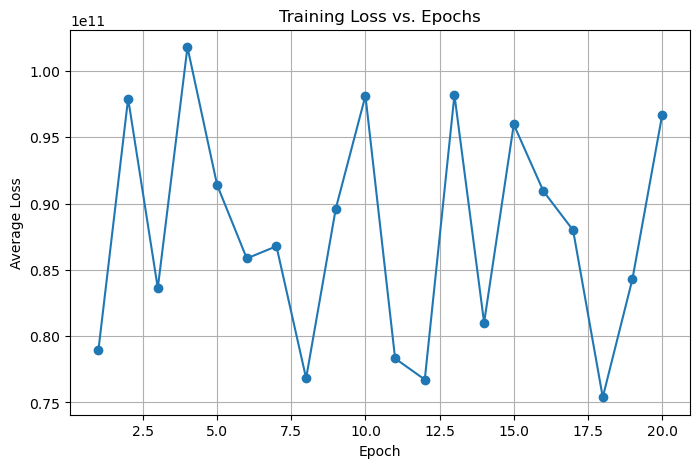

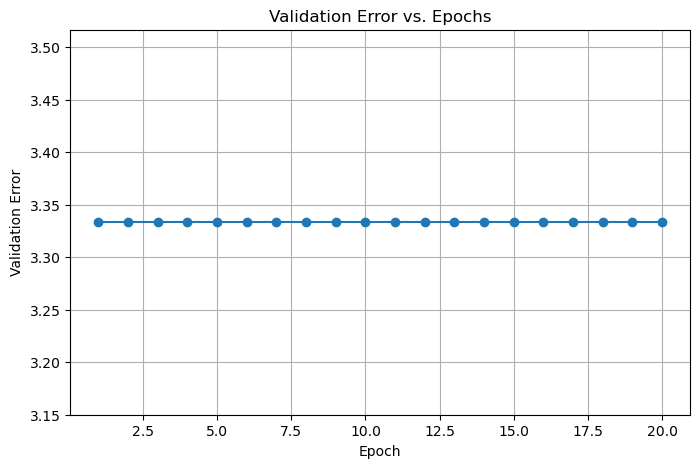

In [ ]:
model.weighted_avg = True
loss_fn = network.pinn_loss
model.start_training(trainloader, optimizer, device, loss_function=loss_fn, validationloader=valid_loader, num_steps=10, num_epochs=20, chunk_size=40)

## Dynamic LR
It is not improving anything I am going crazy and the CPU overhead is crazy. Maybe it's better to decrease quantization.

## Confidence
Lets try to finetune the confidence head after training the other heads

In [4]:
# Dataset in-fov
dataset_path = 'dataset_python_sim'
accumulation_time = 10 # ms
quantization = 8
batch_size = 4
dataset_type = "throws"
labels = ['x_cam', 'y_cam', 'R_cam', 'in_fov']
trainset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, quantization = quantization, split='train', dataset_type=dataset_type, labels=labels)
testset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, quantization = quantization, split='test', dataset_type=dataset_type, labels=labels)
validationset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, quantization = quantization, split='val', dataset_type=dataset_type, labels=labels)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0, collate_fn=trainset.collate_fn)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=testset.collate_fn)
valid_loader = DataLoader(validationset, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=validationset.collate_fn)


Loaded 21531 rows from dataset_python_sim\positions_10ms.csv
Found 156 sequences in dataset_python_sim\positions_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Label shape: None
Split sizes: train=54, val=11, test=13, total=78
Final dataset split='train' size: 54
Loaded 21531 rows from dataset_python_sim\positions_10ms.csv
Found 156 sequences in dataset_python_sim\positions_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Label shape: None
Split sizes: train=54, val=11, test=13, total=78
Final dataset split='test' size: 13
Loaded 21531 rows from dataset_python_sim\positions_10ms.csv
Found 156 sequences in dataset_python_sim\positions_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Label shape: None
Split sizes: train=54, val=11, test=13, total=78
Final dataset split='val' size: 11


In [ ]:

model = network.SCNNVideoClassification(trainset).to(device)
base_lr = 1e-4                       # LR for “regular” weights
conf_lr = 5 * base_lr                # LR for the confidence head

layer_name = 'in_fov'  # specify the layer you want to freeze
# 1. Collect the parameters of the confidence head
conf_params   = list(model.fc_layers[layer_name].parameters())

# 2. Everything else goes in another group
other_params  = [p for n, p in model.named_parameters()
                 if not n.startswith('fc_layers.in_fov')]

freeze_given(model, layer_name)


# 3. Create the optimizer with two groups
optimizer = torch.optim.Adam(
    other_params,
    lr=base_lr,           # adjust if your base LR is different
    weight_decay=0.0   # usually not needed for 1-layer heads
)
loss_fn = network.classification_loss_without_confidence
model.start_training(trainloader, optimizer, device, loss_function=loss_fn, validationloader=valid_loader, num_steps=1, num_epochs=30, chunk_size=40)

model.evaluate(trainloader, device, num_steps=1, print_results=True, weighted_avg=False)

print("Starting training of frozen layer:", layer_name)

freeze_all_except_given(model, layer_name)
optimizer = optim.Adam(conf_params, lr=conf_lr)
loss_fn = network.classification_loss_just_confidence
model.start_training(trainloader, optimizer, device, loss_function=loss_fn, validationloader=valid_loader, num_steps=1, num_epochs=20, chunk_size=40)
model.evaluate(trainloader, device, num_steps=1, print_results=True, weighted_avg=False)

Okay now that ive solved the errors lets train all the heads at the same time normally. Later I can try with two diff LR

Flattened feature size: 14080
Number of x_cam bins: 161
Number of y_cam bins: 91
Number of R_cam bins: 101
Number of in_fov bins: 1
Evaluating video classification tracker
Average Error for x_cam: 65.2505 pixels
Average Error for y_cam: 17.7244 pixels
Average Error for R_cam: 11.5950 pixels
Average Error for in_fov: 0.4984 pixels
Epoch 1/20, Loss: 0.2066, Validation Error: 68.6038 pixels
Evaluating video classification tracker
Average Error for x_cam: 59.4656 pixels
Average Error for y_cam: 18.0501 pixels
Average Error for R_cam: 7.6889 pixels
Average Error for in_fov: 0.4989 pixels
Epoch 2/20, Loss: 0.2232, Validation Error: 62.6205 pixels
Evaluating video classification tracker
Average Error for x_cam: 51.7286 pixels
Average Error for y_cam: 17.6994 pixels
Average Error for R_cam: 12.2714 pixels
Average Error for in_fov: 0.5070 pixels
Epoch 3/20, Loss: 0.2096, Validation Error: 56.0353 pixels
Evaluating video classification tracker
Average Error for x_cam: 41.2004 pixels
Average Erro

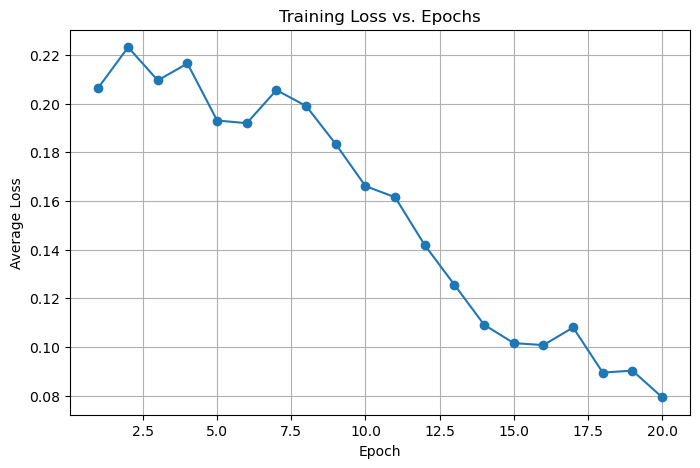

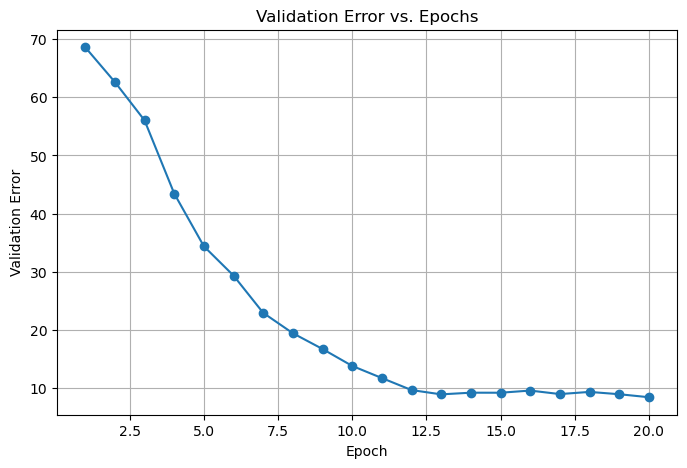

In [ ]:
model = network.SCNNVideoClassification(trainset).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4)
loss_fn = network.classification_loss_w_confidence


Evaluating video classification tracker
Average Error for x_cam: 6.5386 pixels
Average Error for y_cam: 4.5616 pixels
Average Error for R_cam: 3.4217 pixels
Average Error for in_fov: 0.1922 pixels
Epoch 1/20, Loss: 0.0881, Validation Error: 8.6779 pixels
Evaluating video classification tracker
Average Error for x_cam: 5.9332 pixels
Average Error for y_cam: 4.3716 pixels
Average Error for R_cam: 3.5261 pixels
Average Error for in_fov: 0.1885 pixels
Epoch 2/20, Loss: 0.0736, Validation Error: 8.1721 pixels
Evaluating video classification tracker
Average Error for x_cam: 5.8309 pixels
Average Error for y_cam: 4.3340 pixels
Average Error for R_cam: 3.4927 pixels
Average Error for in_fov: 0.1743 pixels
Epoch 3/20, Loss: 0.0741, Validation Error: 8.0630 pixels
Evaluating video classification tracker
Average Error for x_cam: 6.1441 pixels
Average Error for y_cam: 4.4593 pixels
Average Error for R_cam: 3.2797 pixels
Average Error for in_fov: 0.1627 pixels
Epoch 4/20, Loss: 0.0758, Validation E

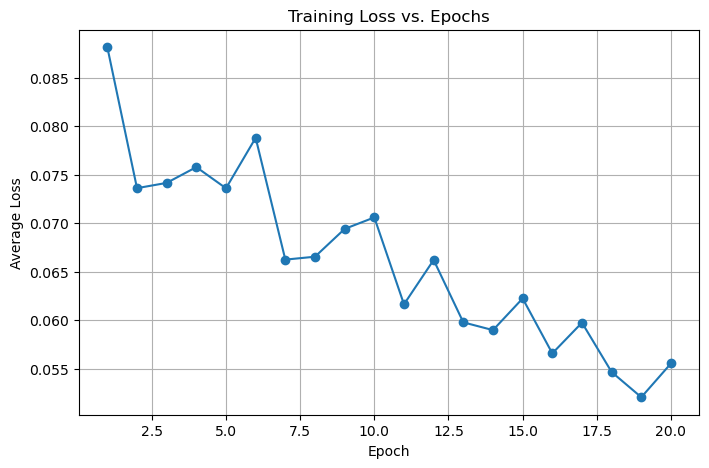

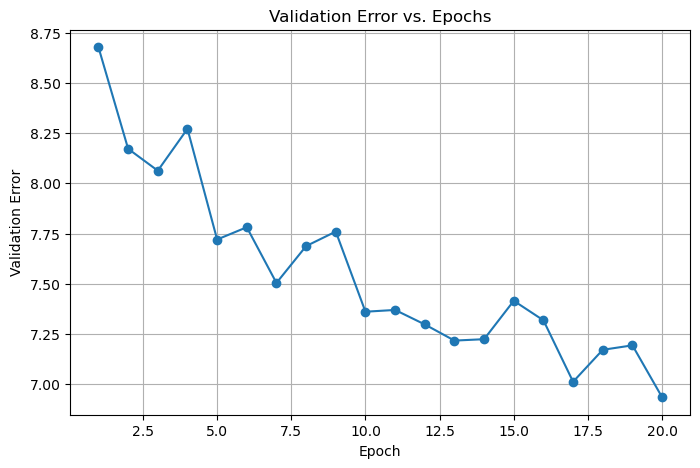

In [50]:
model.start_training(trainloader, optimizer, device, loss_function=loss_fn, validationloader=valid_loader, num_steps=1, num_epochs=20, chunk_size=40)

Flattened feature size: 14080
Number of x_cam bins: 161
Number of y_cam bins: 91
Number of R_cam bins: 101
Number of in_fov bins: 1
Evaluating video classification tracker
Average Error for x_cam: 43.4676 pixels
Average Error for y_cam: 14.0438 pixels
Average Error for R_cam: 3.0042 pixels
Average Error for in_fov: 0.4914 pixels
Epoch 1/50, Loss: 0.2078, Validation Error: 45.7813 pixels
Evaluating video classification tracker
Average Error for x_cam: 36.6848 pixels
Average Error for y_cam: 14.1127 pixels
Average Error for R_cam: 2.9144 pixels
Average Error for in_fov: 0.4676 pixels
Epoch 2/50, Loss: 0.2163, Validation Error: 39.4164 pixels
Evaluating video classification tracker
Average Error for x_cam: 12.2422 pixels
Average Error for y_cam: 8.6388 pixels
Average Error for R_cam: 5.9708 pixels
Average Error for in_fov: 0.3210 pixels
Epoch 3/50, Loss: 0.1777, Validation Error: 16.1324 pixels
Evaluating video classification tracker
Average Error for x_cam: 11.6848 pixels
Average Error f

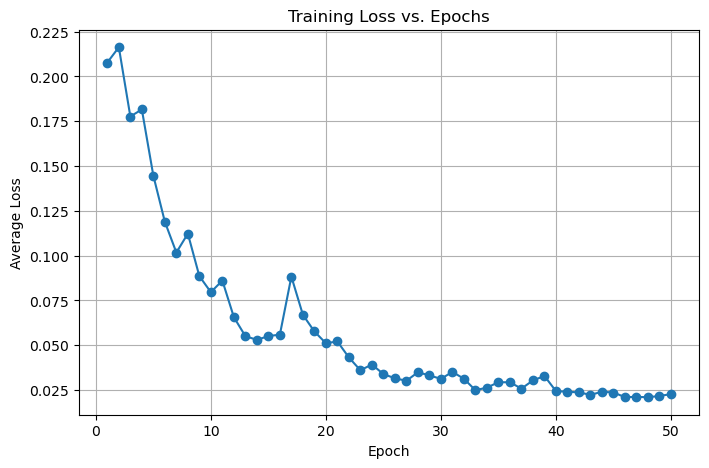

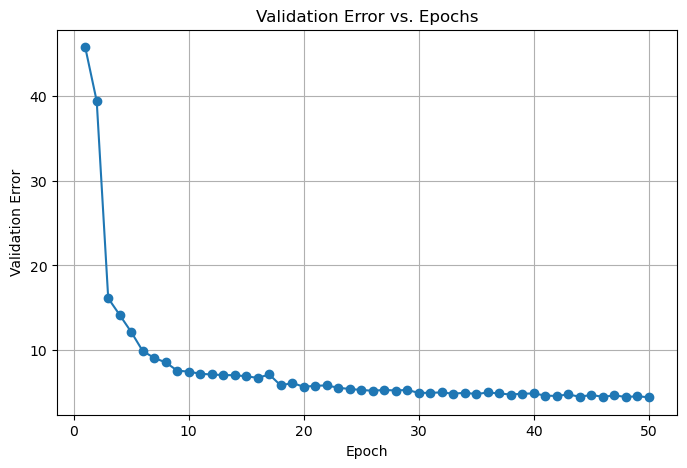

In [ ]:
model = network.SCNNVideoClassification(trainset).to(device)
base_lr = 1e-3                       # LR for “regular” weights
conf_lr = 5 * base_lr                # LR for the confidence head

layer_name = 'in_fov'  # specify the layer you want to freeze
# 1. Collect the parameters of the confidence head
conf_params   = list(model.fc_layers[layer_name].parameters())

# 2. Everything else goes in another group
other_params  = [p for n, p in model.named_parameters()
                 if not n.startswith('fc_layers.in_fov')]

# 3. Create the optimizer with two groups
optimizer = torch.optim.Adam(
    [{'params': conf_params, 'lr': conf_lr},
     {'params': other_params, 'lr': base_lr}],
    weight_decay=1e-5   # applies to *both* groups unless overridden
)
loss_fn = network.classification_loss_w_confidence


Evaluating video classification tracker
Average Error for x_cam: 2.7307 pixels
Average Error for y_cam: 3.0814 pixels
Average Error for R_cam: 2.9144 pixels
Average Error for in_fov: 0.0374 pixels
Epoch 1/10, Loss: 0.0851, Validation Error: 5.0445 pixels
Evaluating video classification tracker
Average Error for x_cam: 2.8706 pixels
Average Error for y_cam: 2.9729 pixels
Average Error for R_cam: 2.7432 pixels
Average Error for in_fov: 0.0392 pixels
Epoch 2/10, Loss: 0.0485, Validation Error: 4.9603 pixels
Evaluating video classification tracker
Average Error for x_cam: 2.8017 pixels
Average Error for y_cam: 2.8580 pixels
Average Error for R_cam: 2.6868 pixels
Average Error for in_fov: 0.0388 pixels
Epoch 3/10, Loss: 0.0398, Validation Error: 4.8206 pixels
Evaluating video classification tracker
Average Error for x_cam: 2.7453 pixels
Average Error for y_cam: 2.7161 pixels
Average Error for R_cam: 2.6868 pixels
Average Error for in_fov: 0.0407 pixels
Epoch 4/10, Loss: 0.0338, Validation E

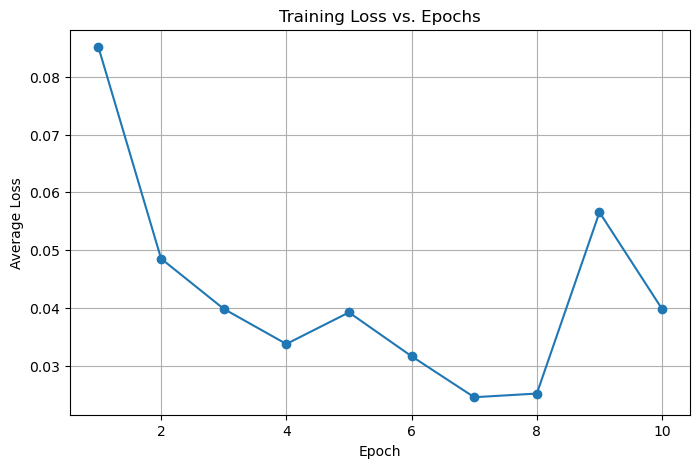

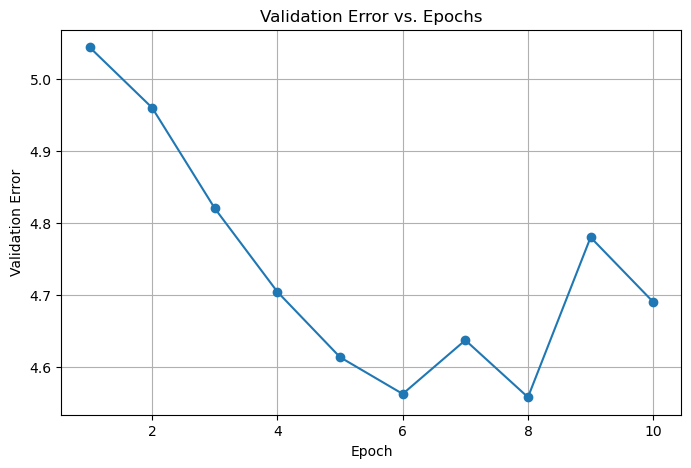

In [8]:
model.start_training(trainloader, optimizer, device, loss_function=loss_fn, validationloader=valid_loader, num_steps=1, num_epochs=10, chunk_size=40)


Now lets try to train the same model with all the trajectories

In [ ]:
dataset_path = 'dataset_python_sim'
accumulation_time = 10 # ms
quantization = 8
batch_size = 4
dataset_type = "all"
labels = ['x_cam', 'y_cam', 'R_cam', 'in_fov']
trainset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, quantization = quantization, split='train', dataset_type=dataset_type, labels=labels)
testset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, quantization = quantization, split='test', dataset_type=dataset_type, labels=labels)
validationset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, quantization = quantization, split='val', dataset_type=dataset_type, labels=labels)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0, collate_fn=trainset.collate_fn)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=testset.collate_fn)
valid_loader = DataLoader(validationset, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=validationset.collate_fn)

model = network.SCNNVideoClassification(trainset).to(device)
base_lr = 1e-3                       # LR for “regular” weights
conf_lr = 5 * base_lr                # LR for the confidence head

layer_name = 'in_fov'  # specify the layer you want to freeze
# 1. Collect the parameters of the confidence head
conf_params   = list(model.fc_layers[layer_name].parameters())

# 2. Everything else goes in another group
other_params  = [p for n, p in model.named_parameters()
                 if not n.startswith('fc_layers.in_fov')]

# 3. Create the optimizer with two groups
optimizer = torch.optim.Adam(
    [{'params': conf_params, 'lr': conf_lr},
     {'params': other_params, 'lr': base_lr}],
    weight_decay=1e-5   # applies to *both* groups unless overridden
)
loss_fn = network.classification_loss_w_confidence
model.start_training(trainloader, optimizer, device, loss_function=loss_fn, validationloader=valid_loader, num_steps=1, num_epochs=60, chunk_size=40)


Loaded 21531 rows from dataset_python_sim\positions_10ms.csv
Found 156 sequences in dataset_python_sim\positions_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Label shape: None
Split sizes: train=109, val=23, test=24, total=156
Final dataset split='train' size: 109
Loaded 21531 rows from dataset_python_sim\positions_10ms.csv
Found 156 sequences in dataset_python_sim\positions_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Label shape: None
Split sizes: train=109, val=23, test=24, total=156
Final dataset split='test' size: 24
Loaded 21531 rows from dataset_python_sim\positions_10ms.csv
Found 156 sequences in dataset_python_sim\positions_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Label shape: None
Split sizes: train=109, val=23, test=24, total=156
Final dataset split='val' size: 23
Flattened feature size: 14080
Number of x_cam bins: 161
Number of y_cam bins: 91
Number of R_cam bins: 101
Number of in_fov bins: 1
Evaluating video classification tracker
Average 

KeyboardInterrupt: 

Doesnt seem to converge. I am going to train just the spatial heads first and then the others. The spatial heads get trained on the infov set

In [16]:
csv_path = f'dataset_python_sim/positions_in_fov_{accumulation_time}ms.csv'
df = pd.read_csv(csv_path)
df['in_fov'] = 1
df.to_csv(csv_path, index=False)

Loaded 20632 rows from dataset_python_sim/positions_in_fov_10ms.csv
Found 156 sequences in dataset_python_sim/positions_in_fov_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Label shape: None
Split sizes: train=109, val=23, test=24, total=156
Final dataset split='train' size: 109
Loaded 20632 rows from dataset_python_sim/positions_in_fov_10ms.csv
Found 156 sequences in dataset_python_sim/positions_in_fov_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Label shape: None
Split sizes: train=109, val=23, test=24, total=156
Final dataset split='test' size: 24
Loaded 20632 rows from dataset_python_sim/positions_in_fov_10ms.csv
Found 156 sequences in dataset_python_sim/positions_in_fov_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Label shape: None
Split sizes: train=109, val=23, test=24, total=156
Final dataset split='val' size: 23
Flattened feature size: 14080
Number of x_cam bins: 161
Number of y_cam bins: 91
Number of R_cam bins: 101
Number of in_fov bins: 1
Traina

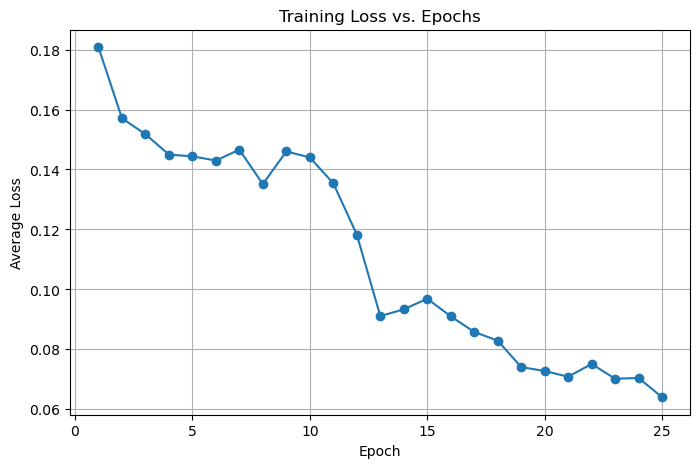

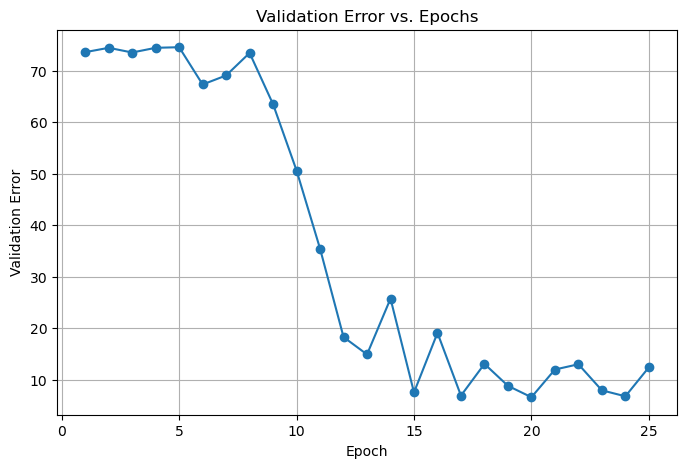

Model saved at models/VideoClassification_without_confidence_q8_10ts_25e.pt
Evaluating video classification tracker
Average Error for x_cam: 11.6297 pixels
Average Error for y_cam: 6.3670 pixels
Average Error for R_cam: 0.9355 pixels
Average Error for in_fov: 0.4999 pixels
Loaded 21531 rows from dataset_python_sim\positions_10ms.csv
Found 156 sequences in dataset_python_sim\positions_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Label shape: None
Split sizes: train=109, val=23, test=24, total=156
Final dataset split='train' size: 109
Loaded 21531 rows from dataset_python_sim\positions_10ms.csv
Found 156 sequences in dataset_python_sim\positions_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Label shape: None
Split sizes: train=109, val=23, test=24, total=156
Final dataset split='test' size: 24
Loaded 21531 rows from dataset_python_sim\positions_10ms.csv
Found 156 sequences in dataset_python_sim\positions_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Label shap

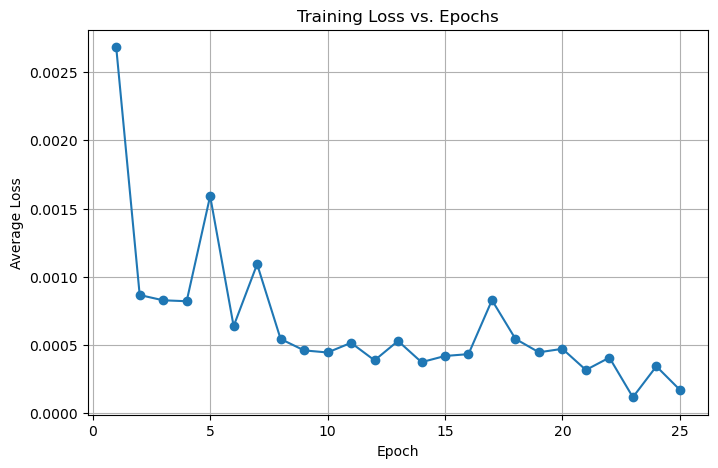

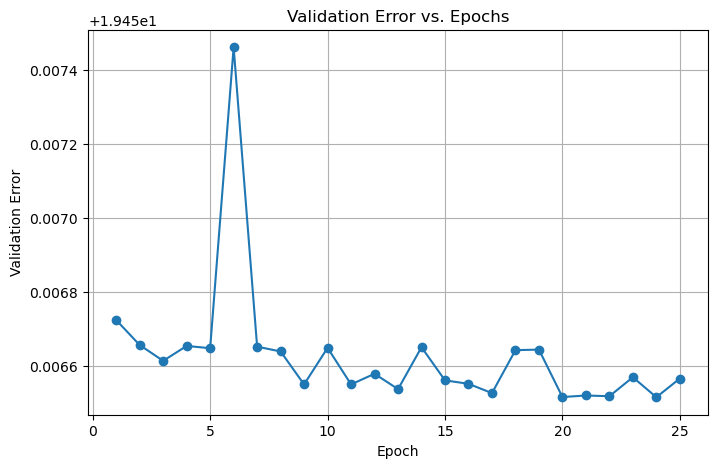

Evaluating video classification tracker
Average Error for x_cam: 11.7819 pixels
Average Error for y_cam: 7.3067 pixels
Average Error for R_cam: 1.9214 pixels
Average Error for in_fov: 0.0476 pixels


array([11.78193277,  7.30672269,  1.92142857,  0.04759856])

In [ ]:
dataset_path = 'dataset_python_sim'
accumulation_time = 10 # ms
quantization = 8
batch_size = 4
dataset_type = 'all'
new_positions_csv = f'dataset_python_sim/positions_in_fov_{accumulation_time}ms.csv'
labels = ['x_cam', 'y_cam', 'R_cam', 'in_fov']
trainset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, positions_csv=new_positions_csv, quantization = quantization, split='train', dataset_type=dataset_type, augment=False, labels=labels)
testset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, positions_csv=new_positions_csv, quantization = quantization, split='test', dataset_type=dataset_type, labels=labels)
validationset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, positions_csv=new_positions_csv, quantization = quantization, split='val', dataset_type=dataset_type, labels=labels)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0, collate_fn=trainset.collate_fn)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=testset.collate_fn)
valid_loader = DataLoader(validationset, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=validationset.collate_fn)

model = network.SCNNVideoClassification(trainset, learn_threshold=True).to(device)
base_lr = 1e-3                       # LR for “regular” weights
conf_lr = 5 * base_lr                # LR for the confidence head

layer_name = 'in_fov'  # specify the layer you want to freeze
# 1. Collect the parameters of the confidence head
conf_params   = list(model.fc_layers[layer_name].parameters())

# 2. Everything else goes in another group
other_params  = [p for n, p in model.named_parameters()
                 if not n.startswith('fc_layers.in_fov')]

freeze_given(model, layer_name)


# 3. Create the optimizer with two groups
optimizer = torch.optim.Adam(
    other_params,
    lr=base_lr,           # adjust if your base LR is different
    weight_decay=1e-5   # usually not needed for 1-layer heads
)
loss_fn = network.classification_loss_without_confidence
model.start_training(trainloader, optimizer, device, loss_function=loss_fn, validationloader=valid_loader, num_steps=10, num_epochs=25, chunk_size=40, grad_clip=True)
model.name += "_without_confidence"
network.save_model(model)

model.evaluate(testloader, device, num_steps=10, print_results=True, weighted_avg=False)

dataset_path = 'dataset_python_sim'
accumulation_time = 10 # ms
quantization = 8
batch_size = 4
dataset_type = "all"
labels = ['x_cam', 'y_cam', 'R_cam', 'in_fov']
trainset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, quantization = quantization, split='train', dataset_type=dataset_type, labels=labels)
testset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, quantization = quantization, split='test', dataset_type=dataset_type, labels=labels)
validationset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, quantization = quantization, split='val', dataset_type=dataset_type, labels=labels)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0, collate_fn=trainset.collate_fn)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=testset.collate_fn)
valid_loader = DataLoader(validationset, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=validationset.collate_fn)


print("Starting training of frozen layer:", layer_name)

freeze_all_except_given(model, layer_name)
model.name = 'VideoClassification_w_confidence'
optimizer = optim.Adam(conf_params, lr=conf_lr)
loss_fn = network.classification_loss_just_confidence
model.start_training(trainloader, optimizer, device, loss_function=loss_fn, validationloader=valid_loader, num_steps=10, num_epochs=25, chunk_size=40, grad_clip=True)
model.evaluate(testloader, device, num_steps=1, print_results=True, weighted_avg=False)

Next experiments:
- Dont freeze any heads, just train with the in-fov dataset using 1 as the label for in_fov. Then switch to the "all" dataset.
- Increase the epochs in the spatial phase
- Try with fewer time steps (1, 2, 5, 10) and compare results


In [ ]:
model = network.load_model('models/VideoClassification_without_confidence_q8_10ts_10e.pt', network.SCNNVideoClassification, trainset, device)
freeze_given(model, 'in_fov')
model.name += "_without_confidence"
loss_fn = network.classification_loss_without_confidence
optimizer = optim.Adam(model.parameters(), lr=1e-4)
model.start_training(trainloader, optimizer, device, loss_function=loss_fn, validationloader=valid_loader, num_steps=10, num_epochs=20, chunk_size=40, grad_clip=True)
model.training_params['num_epochs'] = 65
network.save_model(model)

c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\network.py:1950: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)


Loading model with weighted average: False
Flattened feature size: 14080
Number of x_cam bins: 161
Number of y_cam bins: 91
Number of R_cam bins: 101
Number of in_fov bins: 1
Trainable parameters:
✓ conv1.weight
✓ conv1.bias
✓ conv2.weight
✓ conv2.bias
✓ conv3.weight
✓ conv3.bias
✓ fc_layers.x_cam.weight
✓ fc_layers.x_cam.bias
✓ fc_layers.y_cam.weight
✓ fc_layers.y_cam.bias
✓ fc_layers.R_cam.weight
✓ fc_layers.R_cam.bias


KeyboardInterrupt: 

Loaded 20632 rows from dataset_python_sim/positions_in_fov_10ms.csv
Found 156 sequences in dataset_python_sim/positions_in_fov_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Label shape: None
Split sizes: train=109, val=23, test=24, total=156
Final dataset split='train' size: 109
Loaded 20632 rows from dataset_python_sim/positions_in_fov_10ms.csv
Found 156 sequences in dataset_python_sim/positions_in_fov_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Label shape: None
Split sizes: train=109, val=23, test=24, total=156
Final dataset split='test' size: 24
Loaded 20632 rows from dataset_python_sim/positions_in_fov_10ms.csv
Found 156 sequences in dataset_python_sim/positions_in_fov_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Label shape: None
Split sizes: train=109, val=23, test=24, total=156
Final dataset split='val' size: 23
Training with num_steps=1
Flattened feature size: 14080
Number of x_cam bins: 161
Number of y_cam bins: 91
Number of R_cam bins: 101
Numbe

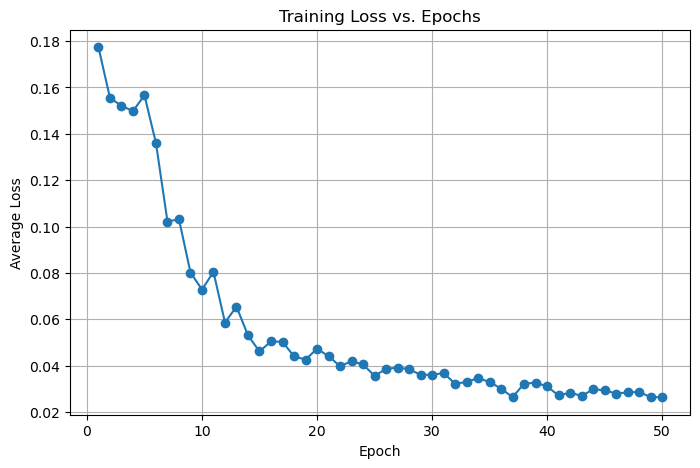

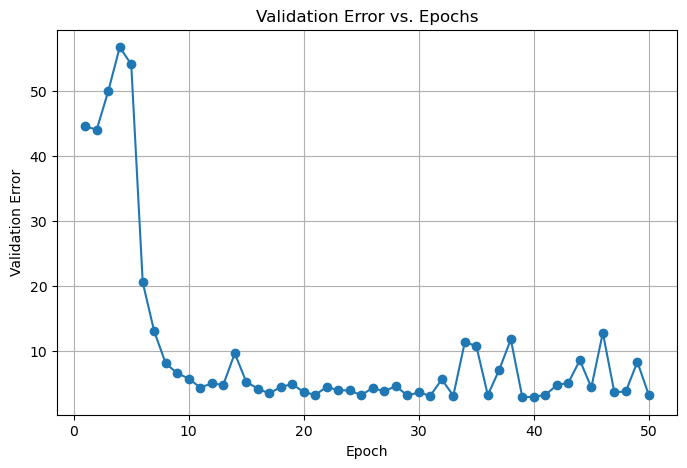

Evaluating video regression tracker
Average Error for x_cam: 3.4979 pixels
Average Error for y_cam: 2.0889 pixels
Average Error for R_cam: 1.9522 pixels
Average Error for in_fov: 1.0000 pixels
Model saved at models/VideoClassification_without_confidence_q8_1ts_50e.pt
--------------------------------------------------
Training with num_steps=2
Flattened feature size: 14080
Number of x_cam bins: 161
Number of y_cam bins: 91
Number of R_cam bins: 101
Number of in_fov bins: 1
Trainable parameters:
✓ conv1.weight
✓ conv1.bias
✓ lif1.threshold
✓ conv2.weight
✓ conv2.bias
✓ lif2.threshold
✓ conv3.weight
✓ conv3.bias
✓ lif3.threshold
✓ fc_layers.x_cam.weight
✓ fc_layers.x_cam.bias
✓ fc_layers.y_cam.weight
✓ fc_layers.y_cam.bias
✓ fc_layers.R_cam.weight
✓ fc_layers.R_cam.bias
✓ lif_layers.x_cam.threshold
✓ lif_layers.y_cam.threshold
✓ lif_layers.R_cam.threshold
Evaluating video classification tracker
Average Error for x_cam: 64.4979 pixels
Average Error for y_cam: 9.9417 pixels
Average Error fo

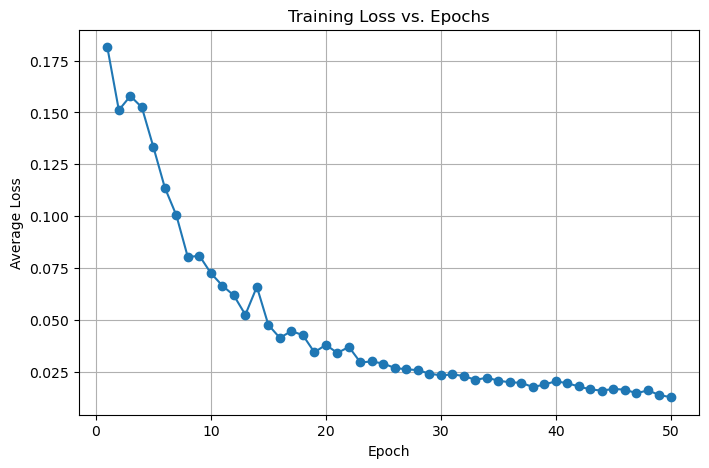

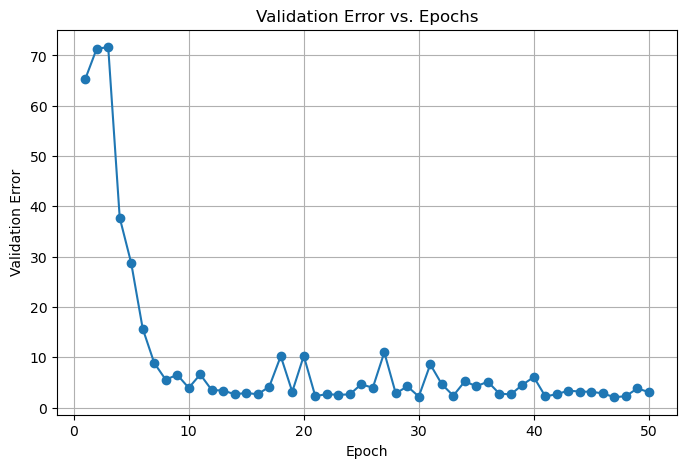

Evaluating video regression tracker
Average Error for x_cam: 4.1127 pixels
Average Error for y_cam: 1.3891 pixels
Average Error for R_cam: 1.3907 pixels
Average Error for in_fov: 1.0000 pixels
Model saved at models/VideoClassification_without_confidence_q8_2ts_50e.pt
--------------------------------------------------
Training with num_steps=5
Flattened feature size: 14080
Number of x_cam bins: 161
Number of y_cam bins: 91
Number of R_cam bins: 101
Number of in_fov bins: 1
Trainable parameters:
✓ conv1.weight
✓ conv1.bias
✓ lif1.threshold
✓ conv2.weight
✓ conv2.bias
✓ lif2.threshold
✓ conv3.weight
✓ conv3.bias
✓ lif3.threshold
✓ fc_layers.x_cam.weight
✓ fc_layers.x_cam.bias
✓ fc_layers.y_cam.weight
✓ fc_layers.y_cam.bias
✓ fc_layers.R_cam.weight
✓ fc_layers.R_cam.bias
✓ lif_layers.x_cam.threshold
✓ lif_layers.y_cam.threshold
✓ lif_layers.R_cam.threshold
Evaluating video classification tracker
Average Error for x_cam: 47.9493 pixels
Average Error for y_cam: 8.5890 pixels
Average Error fo

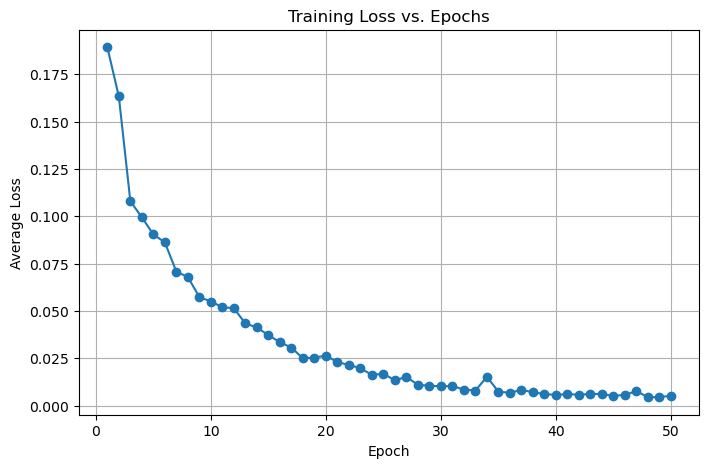

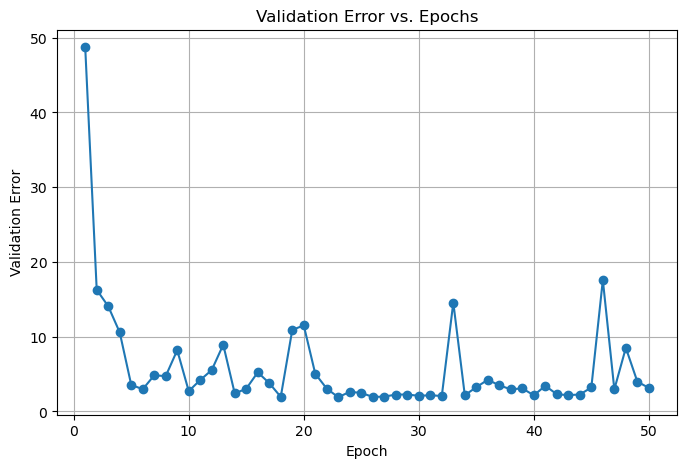

Evaluating video regression tracker
Average Error for x_cam: 3.3958 pixels
Average Error for y_cam: 2.1876 pixels
Average Error for R_cam: 0.7724 pixels
Average Error for in_fov: 1.0000 pixels
Model saved at models/VideoClassification_without_confidence_q8_5ts_50e.pt
--------------------------------------------------
Training with num_steps=10
Flattened feature size: 14080
Number of x_cam bins: 161
Number of y_cam bins: 91
Number of R_cam bins: 101
Number of in_fov bins: 1
Trainable parameters:
✓ conv1.weight
✓ conv1.bias
✓ lif1.threshold
✓ conv2.weight
✓ conv2.bias
✓ lif2.threshold
✓ conv3.weight
✓ conv3.bias
✓ lif3.threshold
✓ fc_layers.x_cam.weight
✓ fc_layers.x_cam.bias
✓ fc_layers.y_cam.weight
✓ fc_layers.y_cam.bias
✓ fc_layers.R_cam.weight
✓ fc_layers.R_cam.bias
✓ lif_layers.x_cam.threshold
✓ lif_layers.y_cam.threshold
✓ lif_layers.R_cam.threshold
Evaluating video classification tracker
Average Error for x_cam: 33.9352 pixels
Average Error for y_cam: 9.1628 pixels
Average Error f

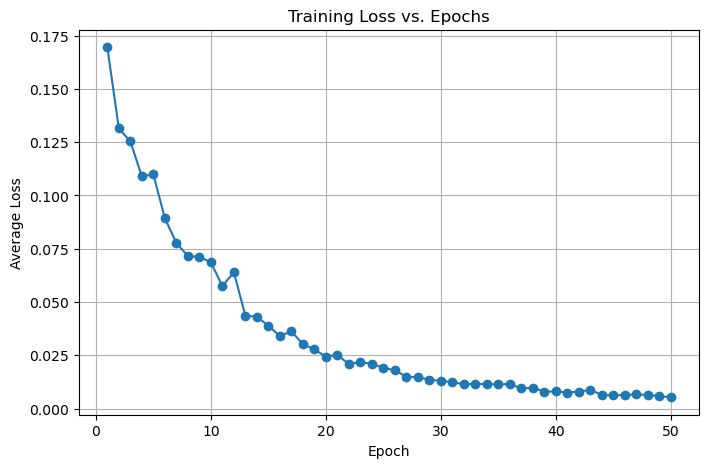

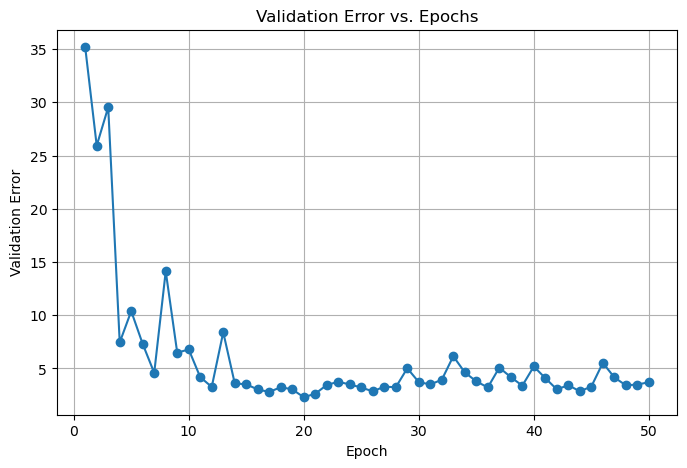

Evaluating video regression tracker
Average Error for x_cam: 3.6015 pixels
Average Error for y_cam: 1.9232 pixels
Average Error for R_cam: 1.3759 pixels
Average Error for in_fov: 1.0000 pixels
Model saved at models/VideoClassification_without_confidence_q8_10ts_50e.pt
--------------------------------------------------


In [ ]:
dataset_path = 'dataset_python_sim'
accumulation_time = 10 # ms
quantization = 8
batch_size = 4
dataset_type = 'all'
new_positions_csv = f'dataset_python_sim/positions_in_fov_{accumulation_time}ms.csv'
labels = ['x_cam', 'y_cam', 'R_cam', 'in_fov']
trainset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, positions_csv=new_positions_csv, quantization = quantization, split='train', dataset_type=dataset_type, augment=False, labels=labels)
testset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, positions_csv=new_positions_csv, quantization = quantization, split='test', dataset_type=dataset_type, labels=labels)
validationset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, positions_csv=new_positions_csv, quantization = quantization, split='val', dataset_type=dataset_type, labels=labels)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0, collate_fn=trainset.collate_fn)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=testset.collate_fn)
valid_loader = DataLoader(validationset, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=validationset.collate_fn)


for num_steps in [1, 2, 5, 10]:
    print(f"Training with num_steps={num_steps}")
    model = network.SCNNVideoClassification(trainset, learn_threshold=True).to(device)
    base_lr = 1e-3                       # LR for “regular” weights
    conf_lr = 5 * base_lr                # LR for the confidence head

    layer_name = 'in_fov'  # specify the layer you want to freeze
    # 1. Collect the parameters of the confidence head
    conf_params   = list(model.fc_layers[layer_name].parameters())

    # 2. Everything else goes in another group
    other_params  = [p for n, p in model.named_parameters()
                    if not n.startswith('fc_layers.in_fov')]

    freeze_given(model, layer_name)


    # 3. Create the optimizer with two groups
    optimizer = torch.optim.Adam(
        other_params,
        lr=base_lr,           # adjust if your base LR is different
        weight_decay=1e-5   # usually not needed for 1-layer heads
    )
    loss_fn = network.classification_loss_without_confidence
    model.name += "_without_confidence"
    model.start_training(trainloader, optimizer, device, loss_function=loss_fn, validationloader=valid_loader, num_steps=num_steps, num_epochs=50, chunk_size=40, grad_clip=True, save = [25, 40, 50])
    model_evaluate = model.evaluate(testloader, device, num_steps=num_steps, print_results=True, weighted_avg=True)
    network.save_model(model)
    print("-" * 50)

The best results were achieved by 5ts after 40 epochs. Thats the one ill be using.

In [ ]:
model = network.load_model('models/VideoClassification_without_confidence_q8_5ts_40e.pt', network.SCNNVideoClassification, trainset, device)

errors = model.evaluate(testloader, device, num_steps=5, print_results=True, weighted_avg=True)
errors_test = errors[:-1]
errors = model.evaluate(valid_loader, device, num_steps=5, print_results=True, weighted_avg=True)
errors_val = errors[:-1]
print("Test errors for each coordinate:", np.linalg.norm(errors_test))
print("Validation errors for each coordinate:", np.linalg.norm(errors_val))

errors = model.evaluate(testloader, device, num_steps=5, print_results=True, weighted_avg=False)
errors_test = errors[:-1]
errors = model.evaluate(valid_loader, device, num_steps=5, print_results=True, weighted_avg=False)
errors_val = errors[:-1]
print("Test errors for each coordinate (no weighted avg):", np.linalg.norm(errors_test))
print("Validation errors for each coordinate (no weighted avg):", np.linalg.norm(errors_val))

Loading model with weighted average: False
Flattened feature size: 14080
Number of x_cam bins: 161
Number of y_cam bins: 91
Number of R_cam bins: 101
Number of in_fov bins: 1
Evaluating video regression tracker
Average Error for x_cam: 2.1701 pixels
Average Error for y_cam: 1.6605 pixels
Average Error for R_cam: 1.0318 pixels
Average Error for in_fov: 1.0000 pixels
Evaluating video regression tracker
Average Error for x_cam: 1.7615 pixels
Average Error for y_cam: 1.0817 pixels
Average Error for R_cam: 0.7819 pixels
Average Error for in_fov: 1.0000 pixels
Test errors for each coordinate: 2.9208952294141115
Validation errors for each coordinate: 2.2100864188839933
Evaluating video classification tracker
Average Error for x_cam: 2.5493 pixels
Average Error for y_cam: 1.7387 pixels
Average Error for R_cam: 0.7452 pixels
Average Error for in_fov: 0.5116 pixels
Evaluating video classification tracker
Average Error for x_cam: 1.6152 pixels
Average Error for y_cam: 1.2203 pixels
Average Error 

Loaded 21531 rows from dataset_python_sim\positions_10ms.csv
Found 156 sequences in dataset_python_sim\positions_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Label shape: None
Split sizes: train=109, val=23, test=24, total=156
Final dataset split='train' size: 109
Loaded 21531 rows from dataset_python_sim\positions_10ms.csv
Found 156 sequences in dataset_python_sim\positions_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Label shape: None
Split sizes: train=109, val=23, test=24, total=156
Final dataset split='test' size: 24
Loaded 21531 rows from dataset_python_sim\positions_10ms.csv
Found 156 sequences in dataset_python_sim\positions_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Label shape: None
Split sizes: train=109, val=23, test=24, total=156
Final dataset split='val' size: 23
Loading model with weighted average: False
Flattened feature size: 14080
Number of x_cam bins: 161
Number of y_cam bins: 91
Number of R_cam bins: 101
Number of in_fov bins: 1
12
Tr

c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\network.py:1950: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)


Evaluating video classification tracker
Average Error for x_cam: 7.5572 pixels
Average Error for y_cam: 6.1245 pixels
Average Error for R_cam: 0.6048 pixels
Average Error for in_fov: 0.0916 pixels
Epoch 1/25, Loss: 0.0042, Validation Error: 9.7465 pixels
Evaluating video classification tracker
Average Error for x_cam: 7.5572 pixels
Average Error for y_cam: 6.1245 pixels
Average Error for R_cam: 0.6048 pixels
Average Error for in_fov: 0.0413 pixels
Epoch 2/25, Loss: 0.0007, Validation Error: 9.7461 pixels
Evaluating video classification tracker
Average Error for x_cam: 7.5572 pixels
Average Error for y_cam: 6.1245 pixels
Average Error for R_cam: 0.6048 pixels
Average Error for in_fov: 0.0367 pixels
Epoch 3/25, Loss: 0.0004, Validation Error: 9.7461 pixels
Evaluating video classification tracker
Average Error for x_cam: 7.5572 pixels
Average Error for y_cam: 6.1245 pixels
Average Error for R_cam: 0.6048 pixels
Average Error for in_fov: 0.0315 pixels
Epoch 4/25, Loss: 0.0002, Validation E

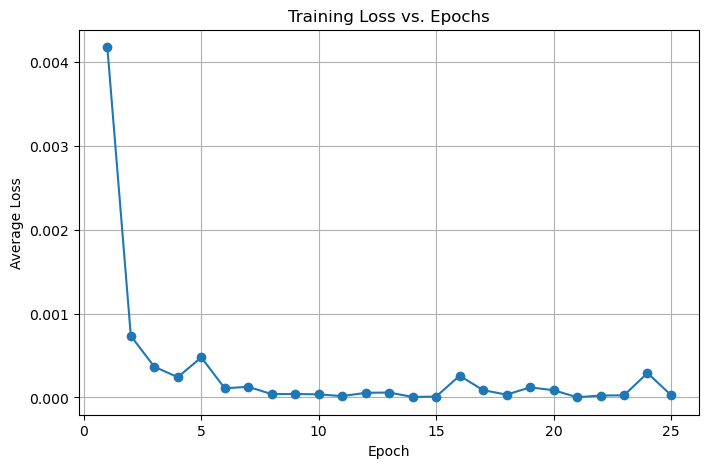

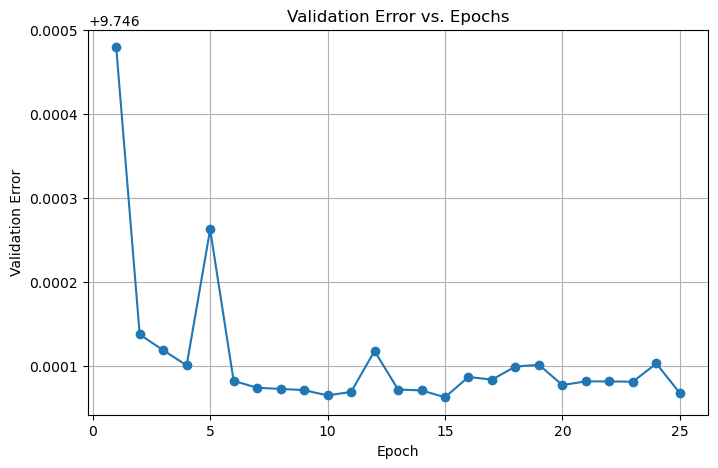

Evaluating video classification tracker
Average Error for x_cam: 6.5634 pixels
Average Error for y_cam: 6.0899 pixels
Average Error for R_cam: 1.8252 pixels
Average Error for in_fov: 0.0492 pixels
Test error after training confidence head: 9.137817461877091
Model saved at models/VideoClassification_w_confidence_q8_5ts_25e.pt


In [ ]:
dataset_path = 'dataset_python_sim'
accumulation_time = 10 # ms
quantization = 8
batch_size = 4
dataset_type = "all"
labels = ['x_cam', 'y_cam', 'R_cam', 'in_fov']
trainset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, quantization = quantization, split='train', dataset_type=dataset_type, labels=labels)
testset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, quantization = quantization, split='test', dataset_type=dataset_type, labels=labels)
validationset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, quantization = quantization, split='val', dataset_type=dataset_type, labels=labels)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0, collate_fn=trainset.collate_fn)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=testset.collate_fn)
valid_loader = DataLoader(validationset, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=validationset.collate_fn)

model = network.load_model('models/VideoClassification_without_confidence_q8_5ts_40e.pt', network.SCNNVideoClassification, trainset, device)

base_lr = 1e-3                       # LR for “regular” weights
conf_lr = 5 * base_lr                # LR for the confidence head

layer_name = 'in_fov'  # specify the layer you want to freeze
# 1. Collect the parameters of the confidence head
conf_params   = list(model.fc_layers[layer_name].parameters())

# 2. Everything else goes in another group
other_params  = [p for n, p in model.named_parameters()
                 if not n.startswith('fc_layers.in_fov') and not n.startswith('lif_layers.in_fov')]

print(len(other_params))


freeze_all_except_given(model, layer_name)

print("Starting training of frozen layer:", layer_name)

model.name = 'VideoClassification_w_confidence'
optimizer = optim.Adam(conf_params, lr=conf_lr)
loss_fn = network.classification_loss_just_confidence
model.start_training(trainloader, optimizer, device, loss_function=loss_fn, validationloader=valid_loader, num_steps=5, num_epochs=25, chunk_size=40, grad_clip=True)
test_error = model.evaluate(testloader, device, num_steps=5, print_results=True, weighted_avg=False)
print("Test error after training confidence head:", np.linalg.norm(test_error))


network.save_model(model)

Now I will finetune the whole model with the same and with a smaller lr to see if it gets better

None of the trainings reduced validation loss. I am increasing weight decay and adding augmentation

c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\network.py:1950: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)


Loading model with weighted average: False
Flattened feature size: 14080
Number of x_cam bins: 161
Number of y_cam bins: 91
Number of R_cam bins: 101
Number of in_fov bins: 1
All parameters are trainable.
Evaluating video classification tracker
Average Error for x_cam: 8.1202 pixels
Average Error for y_cam: 6.6899 pixels
Average Error for R_cam: 0.6033 pixels
Average Error for in_fov: 0.0903 pixels
Epoch 1/20, Loss: 0.1706, Validation Error: 10.5387 pixels
Evaluating video classification tracker
Average Error for x_cam: 7.9760 pixels
Average Error for y_cam: 6.3168 pixels
Average Error for R_cam: 0.5433 pixels
Average Error for in_fov: 0.0872 pixels
Epoch 2/20, Loss: 0.0814, Validation Error: 10.1893 pixels
Evaluating video classification tracker
Average Error for x_cam: 8.0642 pixels
Average Error for y_cam: 6.7179 pixels
Average Error for R_cam: 0.5624 pixels
Average Error for in_fov: 0.0894 pixels
Epoch 3/20, Loss: 0.1813, Validation Error: 10.5112 pixels
Evaluating video classifica

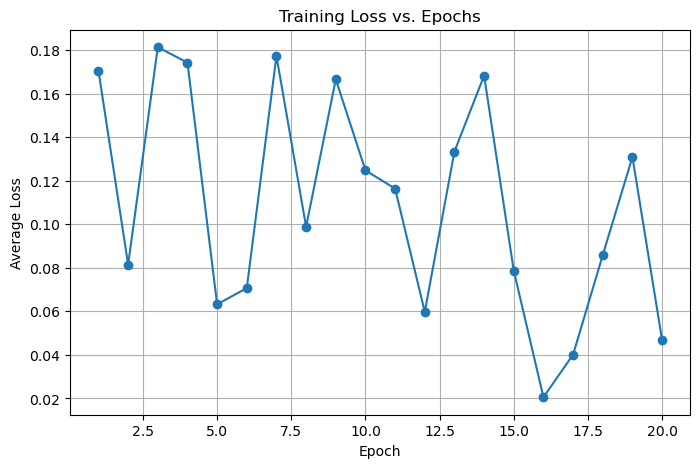

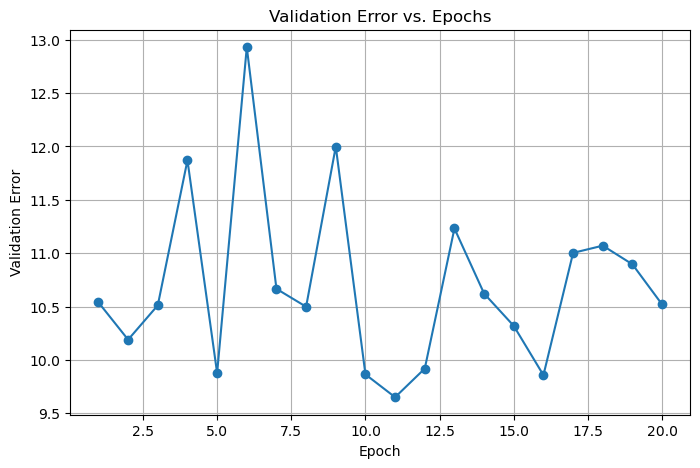

Evaluating video classification tracker
Average Error for x_cam: 7.0971 pixels
Average Error for y_cam: 6.2613 pixels
Average Error for R_cam: 2.3315 pixels
Average Error for in_fov: 0.0413 pixels


array([7.09705882, 6.26134454, 2.33151261, 0.04126444])

In [19]:
model = network.load_model('models/VideoClassification_w_confidence_q8_5ts_25e.pt', network.SCNNVideoClassification, trainset, device)
unfreeze_all(model)

base_lr = 1e-3                       # LR for “regular” weights
conf_lr = 5 * base_lr                # LR for the confidence head

conf_params   = list(model.fc_layers[layer_name].parameters())

# 2. Everything else goes in another group
other_params  = [p for n, p in model.named_parameters()
                 if not n.startswith('fc_layers.in_fov') and not n.startswith('lif_layers.in_fov')]
optimizer = torch.optim.Adam(
    [{'params': conf_params, 'lr': conf_lr},
     {'params': other_params, 'lr': base_lr}],
    weight_decay=1e-5   # applies to *both* groups unless overridden
)
loss_fn = network.classification_loss_w_confidence
model.name = 'VideoClassification_w_confidence_finetuned'
model.start_training(trainloader, optimizer, device, loss_function=loss_fn, validationloader=valid_loader, num_steps=5, num_epochs=20, chunk_size=40, grad_clip=True, save=[10, 15, 20])
model.evaluate(testloader, device, num_steps=5, print_results=True, weighted_avg=False)

In [178]:
dataset_path = 'dataset_python_sim'
accumulation_time = 10 # ms
quantization = 8
batch_size = 4
dataset_type = "all"
labels = ['x_cam', 'y_cam', 'R_cam', 'in_fov']
trainset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, quantization = quantization, split='train', dataset_type=dataset_type, labels=labels, augment=True)
testset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, quantization = quantization, split='test', dataset_type=dataset_type, labels=labels)
validationset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, quantization = quantization, split='val', dataset_type=dataset_type, labels=labels)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0, collate_fn=trainset.collate_fn)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=testset.collate_fn)
valid_loader = DataLoader(validationset, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=validationset.collate_fn)



Loaded 21531 rows from dataset_python_sim\positions_10ms.csv
Found 156 sequences in dataset_python_sim\positions_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Label shape: None
Split sizes: train=109, val=23, test=24, total=156
Final dataset split='train' size: 109
Loaded 21531 rows from dataset_python_sim\positions_10ms.csv
Found 156 sequences in dataset_python_sim\positions_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Label shape: None
Split sizes: train=109, val=23, test=24, total=156
Final dataset split='test' size: 24
Loaded 21531 rows from dataset_python_sim\positions_10ms.csv
Found 156 sequences in dataset_python_sim\positions_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Label shape: None
Split sizes: train=109, val=23, test=24, total=156
Final dataset split='val' size: 23


c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\network.py:1993: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  


Loading model with weighted average: False
Flattened feature size: 14080
Number of x_cam bins: 161
Number of y_cam bins: 91
Number of R_cam bins: 101
Number of in_fov bins: 1
All parameters are trainable.
Epoch 1/20, Loss: 0.0949, Validation Error: 0.2048 pixels
Epoch 2/20, Loss: 0.1179, Validation Error: 0.3105 pixels
Epoch 3/20, Loss: 0.0789, Validation Error: 0.2601 pixels
Epoch 4/20, Loss: 0.0768, Validation Error: 0.3316 pixels
Epoch 5/20, Loss: 0.0459, Validation Error: 0.1483 pixels
Epoch 6/20, Loss: 0.0476, Validation Error: 0.3102 pixels
Epoch 7/20, Loss: 0.0306, Validation Error: 0.1639 pixels
Epoch 8/20, Loss: 0.0285, Validation Error: 0.2534 pixels
Epoch 9/20, Loss: 0.0464, Validation Error: 0.1632 pixels
Epoch 10/20, Loss: 0.0512, Validation Error: 0.0914 pixels
Model saved at models/VideoClassification_w_confidence_finetuned_lower_lr_q8_5ts_10e.pt
Epoch 11/20, Loss: 0.0234, Validation Error: 0.1579 pixels
Epoch 12/20, Loss: 0.0486, Validation Error: 0.1404 pixels
Epoch 13

ValueError: x and y must have same first dimension, but have shapes (20,) and (0,)

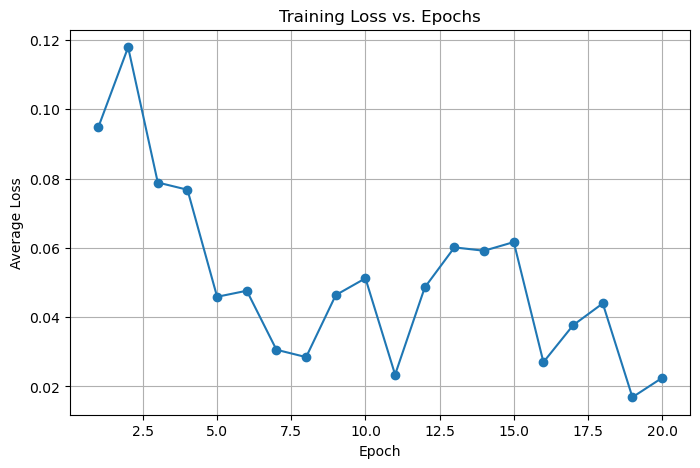

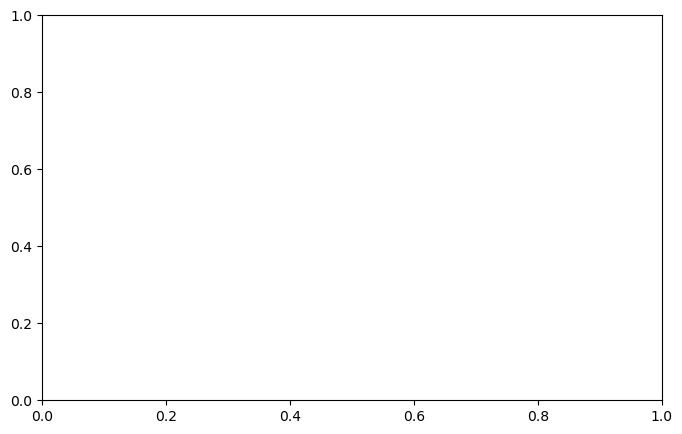

In [186]:

model = network.load_model('models/VideoClassification_w_confidence_q8_5ts_25e.pt', network.SCNNVideoClassification, trainset, device)
unfreeze_all(model)

base_lr = 1e-4                       # LR for “regular” weights
conf_lr = 5 * base_lr                # LR for the confidence head
layer_name = 'in_fov'  

conf_params   = list(model.fc_layers[layer_name].parameters())

# 2. Everything else goes in another group
other_params  = [p for n, p in model.named_parameters()
                 if not n.startswith('fc_layers.in_fov') and not n.startswith('lif_layers.in_fov')]
optimizer = torch.optim.AdamW(
    [{'params': conf_params, 'lr': conf_lr},
     {'params': other_params, 'lr': base_lr}],
    weight_decay=3e-5   # applies to *both* groups unless overridden
)
loss_fn = network.classification_loss_w_confidence
model.name = 'VideoClassification_w_confidence_finetuned_lower_lr'
model.start_training(trainloader, optimizer, device, loss_function=loss_fn, validationloader=valid_loader, num_steps=5, num_epochs=20, chunk_size=40, grad_clip=True, save=[10, 15, 20])
model.evaluate(testloader, device, num_steps=5, print_results=True, weighted_avg=False)

In [23]:
model.evaluate(trainloader, device, num_steps=5, print_results=True, weighted_avg=False)

Evaluating video classification tracker
Average Error for x_cam: 40.8902 pixels
Average Error for y_cam: 1.0949 pixels
Average Error for R_cam: 0.1701 pixels
Average Error for in_fov: 0.0015 pixels


array([4.08902382e+01, 1.09493459e+00, 1.70077155e-01, 1.46728174e-03])

c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\network.py:1999: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  # Create model instance with th

Loading model with weighted average: False
Flattened feature size: 14080
Number of x_cam bins: 161
Number of y_cam bins: 91
Number of R_cam bins: 101
Number of in_fov bins: 1
All parameters are trainable.
Loss for x_cam: 0.18721166253089905
Loss for y_cam: 0.48625439405441284
Loss for R_cam: 0.12294963002204895
Loss conf 1.8723623752593994 cls_loss 0.7964156270027161
Loss for x_cam: 1.3940759897232056
Loss for y_cam: 1.2423477172851562
Loss for R_cam: 0.6947791576385498
Loss conf 119.38890075683594 cls_loss 3.331202507019043
Loss for x_cam: 2.4888339042663574
Loss for y_cam: 1.6359776258468628
Loss for R_cam: 1.576433539390564
Loss conf 2.1752698557975236e-06 cls_loss 5.701244831085205
Loss for x_cam: 3.3374223709106445
Loss for y_cam: 2.911508083343506
Loss for R_cam: 2.4265031814575195
Loss conf 1.557884934300091e-05 cls_loss 8.675433158874512
Loss for x_cam: 1.050889253616333
Loss for y_cam: 0.7396538853645325
Loss for R_cam: 0.5554019808769226
Loss conf 0.00011274728603893891 cls_l

ValueError: x and y must have same first dimension, but have shapes (20,) and (0,)

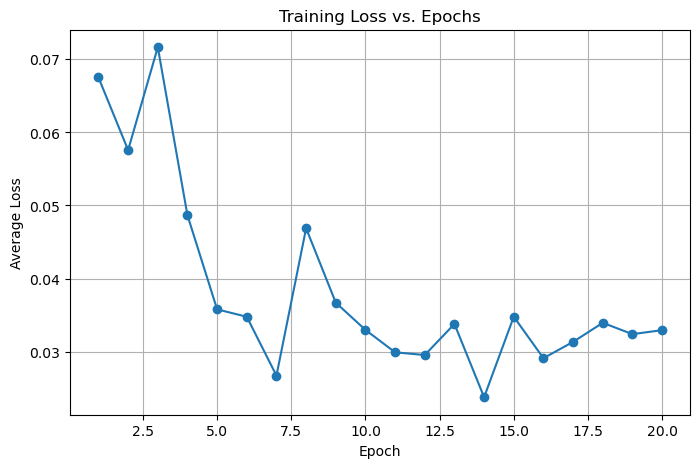

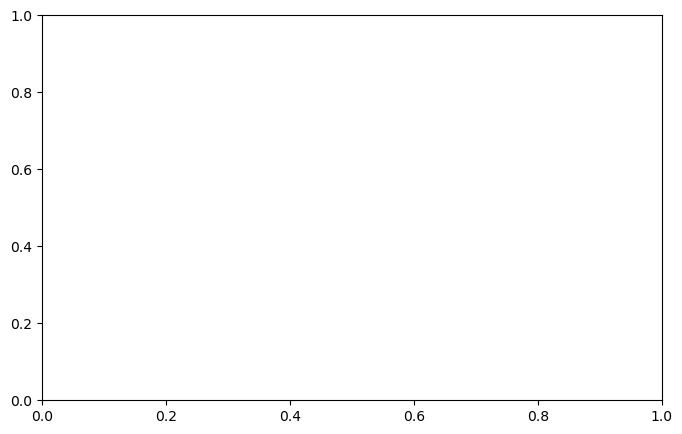

In [190]:
model = network.load_model('models/VideoClassification_w_confidence_q8_5ts_25e.pt', network.SCNNVideoClassification, trainset, device)
unfreeze_all(model)

base_lr = 1e-4                       # LR for “regular” weights
conf_lr = 5 * base_lr                # LR for the confidence head
layer_name = 'in_fov'  

conf_params   = list(model.fc_layers[layer_name].parameters())

# 2. Everything else goes in another group
other_params  = [p for n, p in model.named_parameters()
                 if not n.startswith('fc_layers.in_fov') and not n.startswith('lif_layers.in_fov')]
optimizer = torch.optim.AdamW(
    [{'params': conf_params, 'lr': conf_lr},
     {'params': other_params, 'lr': base_lr}],
    weight_decay=3e-5   # applies to *both* groups unless overridden
)
loss_fn = network.classification_loss_w_confidence
model.name = 'VideoClassification_w_confidence_finetuned_lower_lr'
model.start_training(trainloader, optimizer, device, loss_function=loss_fn, validationloader=valid_loader, num_steps=5, num_epochs=20, chunk_size=40, grad_clip=True, save=[10, 15, 20])
model.evaluate(testloader, device, num_steps=5, print_results=True, weighted_avg=False)

In [192]:
model.evaluate(valid_loader, device, num_steps=5, print_results=True, weighted_avg=False)

Evaluating video classification tracker
Average Error for x_cam: 7.0698 pixels
Average Error for y_cam: 6.0467 pixels
Average Error for R_cam: 0.5482 pixels
Average Error for in_fov: 0.0211 pixels


array([7.0697603 , 6.04671174, 0.54824831, 0.02105179])

# Quantization 4

Lets see how good are the results with q4

I fckd up first try, wrong num_steps. Try again with 5 ts.

In [ ]:
dataset_path = 'dataset_python_sim'
accumulation_time = 10 # ms
quantization = 4
batch_size = 4
dataset_type = 'rolls'
new_positions_csv = f'dataset_python_sim/positions_in_fov_{accumulation_time}ms.csv'
labels = ['x_cam', 'y_cam', 'R_cam', 'in_fov']
trainset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, positions_csv=new_positions_csv, quantization = quantization, split='train', dataset_type=dataset_type, augment=True, labels=labels)
testset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, positions_csv=new_positions_csv, quantization = quantization, split='test', dataset_type=dataset_type, labels=labels)
validationset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, positions_csv=new_positions_csv, quantization = quantization, split='val', dataset_type=dataset_type, labels=labels)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0, collate_fn=trainset.collate_fn)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=testset.collate_fn)
valid_loader = DataLoader(validationset, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=validationset.collate_fn)


Loaded 20632 rows from dataset_python_sim/positions_in_fov_10ms.csv
Found 156 sequences in dataset_python_sim/positions_in_fov_10ms.csv
Shape of the images: torch.Size([2, 180, 320])
Label shape: None
Split sizes: train=54, val=11, test=13, total=78
Final dataset split='train' size: 54
Loaded 20632 rows from dataset_python_sim/positions_in_fov_10ms.csv
Found 156 sequences in dataset_python_sim/positions_in_fov_10ms.csv
Shape of the images: torch.Size([2, 180, 320])
Label shape: None
Split sizes: train=54, val=11, test=13, total=78
Final dataset split='test' size: 13
Loaded 20632 rows from dataset_python_sim/positions_in_fov_10ms.csv
Found 156 sequences in dataset_python_sim/positions_in_fov_10ms.csv
Shape of the images: torch.Size([2, 180, 320])
Label shape: None
Split sizes: train=54, val=11, test=13, total=78
Final dataset split='val' size: 11


In [ ]:
model = network.SCNNVideoClassification(trainset, learn_threshold=True).to(device)
base_lr = 1e-3                       # LR for “regular” weights
conf_lr = 5 * base_lr                # LR for the confidence head

layer_name = 'in_fov'  # specify the layer you want to freeze
# 1. Collect the parameters of the confidence head
conf_params   = list(model.fc_layers[layer_name].parameters())

# 2. Everything else goes in another group
other_params  = [p for n, p in model.named_parameters()
                if not n.startswith('fc_layers.in_fov')]

freeze_given(model, layer_name)


# 3. Create the optimizer with two groups
optimizer = torch.optim.Adam(
    other_params,
    lr=base_lr,           # adjust if your base LR is different
    weight_decay=1e-5   # usually not needed for 1-layer heads
)
loss_fn = network.classification_loss_without_confidence
model.name += "_without_confidence"
model.start_training(trainloader, optimizer, device, loss_function=loss_fn, validationloader=valid_loader, num_steps=5, num_epochs=50, chunk_size=10, grad_clip=True, save = [25, 40, 50])
model_evaluate = model.evaluate(testloader, device, num_steps=num_steps, print_results=True, weighted_avg=True)

Flattened feature size: 56320
Number of x_cam bins: 321
Number of y_cam bins: 181
Number of R_cam bins: 201
Number of in_fov bins: 1
Trainable parameters:
✓ conv1.weight
✓ conv1.bias
✓ lif1.threshold
✓ conv2.weight
✓ conv2.bias
✓ lif2.threshold
✓ conv3.weight
✓ conv3.bias
✓ lif3.threshold
✓ fc_layers.x_cam.weight
✓ fc_layers.x_cam.bias
✓ fc_layers.y_cam.weight
✓ fc_layers.y_cam.bias
✓ fc_layers.R_cam.weight
✓ fc_layers.R_cam.bias
✓ lif_layers.x_cam.threshold
✓ lif_layers.y_cam.threshold
✓ lif_layers.R_cam.threshold


TypeError: classification_loss_without_confidence() got an unexpected keyword argument 'print_results'

In [93]:
network.save_model(model)

Model saved at models/VideoClassification_without_confidence_q4_10ts_39e.pt


In [ ]:
model = network.load_model('models/VideoClassification_without_confidence_q4_10ts_40e.pt', network.SCNNVideoClassification, trainset, device)

c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\network.py:1950: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)


Loading model with weighted average: False
Flattened feature size: 56320
Number of x_cam bins: 321
Number of y_cam bins: 181
Number of R_cam bins: 201
Number of in_fov bins: 1


In [ ]:
model.evaluate(testloader, device, num_steps=10, print_results=True, weighted_avg=False)

Evaluating video classification tracker
Average Error for x_cam: 8.5185 pixels
Average Error for y_cam: 5.1889 pixels
Average Error for R_cam: 1.3932 pixels
Average Error for in_fov: 0.5023 pixels


array([8.51846657, 5.18887331, 1.39317438, 0.50230973])

In [ ]:
video, label, length = trainset.__getitem__(0)
gen = dt.image_gen_for_video(video, label)

180 320
max tensor(1.)
min tensor(0.)


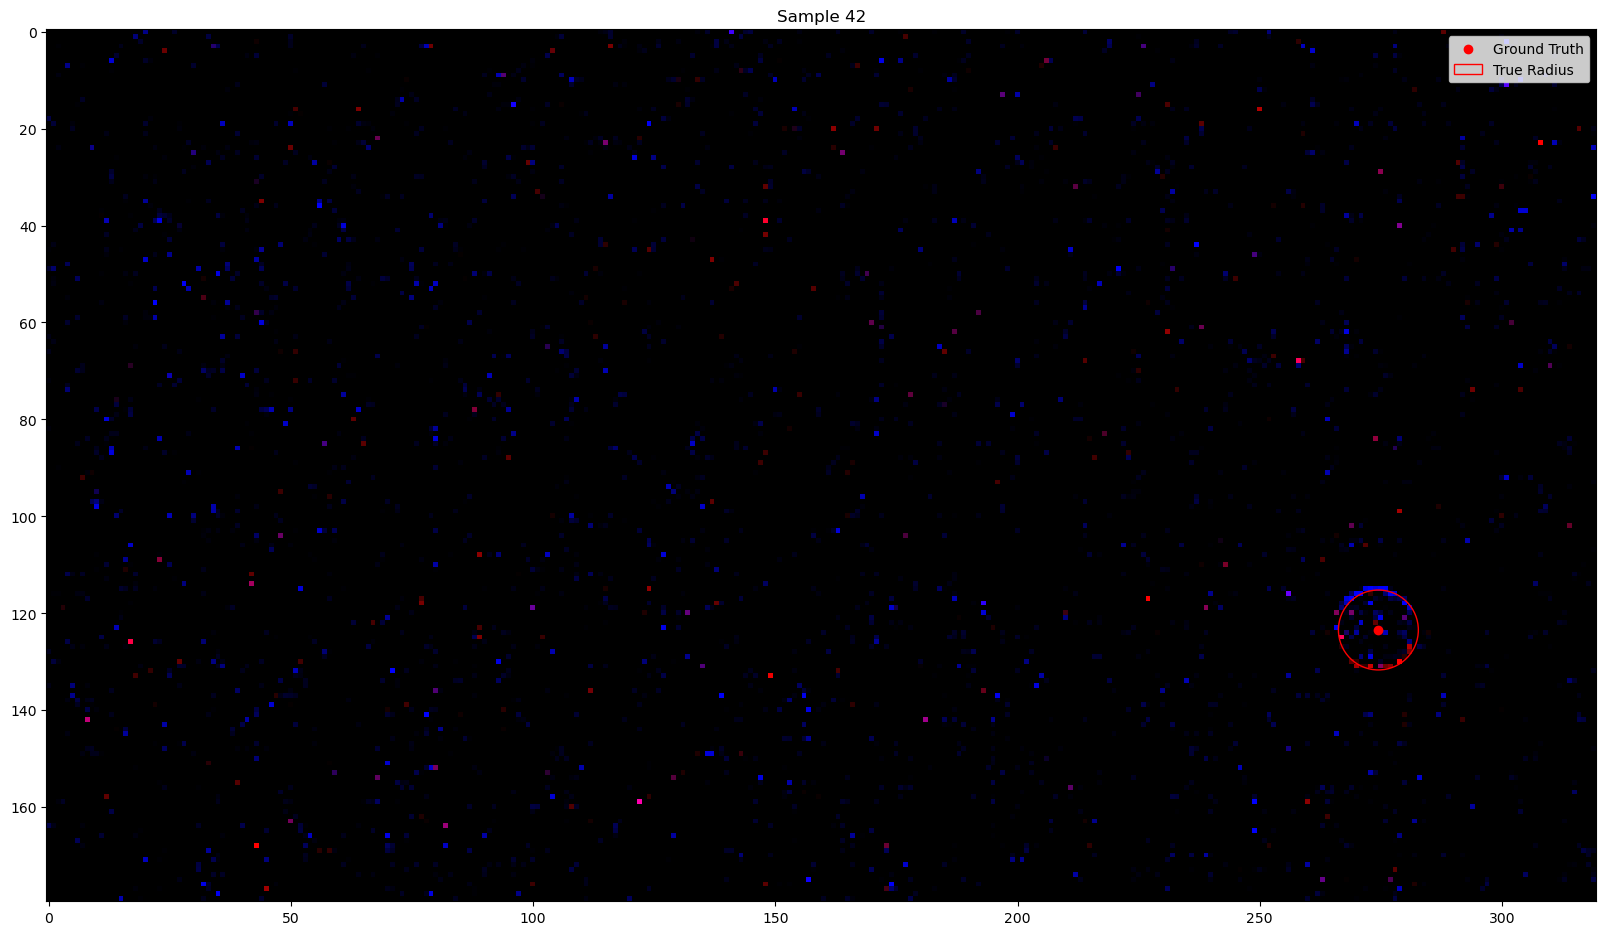

In [176]:
dt.show_next_img(gen)

# New tests

- Q4 5ts
- Confidence net with the out of FOV dataset from the beginning
    Last time it did overfit too much

ADD DROPOUT

Once this is done:
- Error for timesteps to find the inference ts
- Error KF

In [ ]:
dataset_path = 'dataset_python_sim'
accumulation_time = 10 # ms
quantization = 8
batch_size = 4
dataset_type = 'all'
labels = ['x_cam', 'y_cam', 'R_cam', 'in_fov']
trainset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, quantization = quantization, split='train', dataset_type=dataset_type, augment=True, labels=labels)
testset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, quantization = quantization, split='test', dataset_type=dataset_type, labels=labels)
validationset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, quantization = quantization, split='val', dataset_type=dataset_type, labels=labels)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0, collate_fn=trainset.collate_fn)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=testset.collate_fn)
valid_loader = DataLoader(validationset, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=validationset.collate_fn)

num_steps = 5

print(f"Training with num_steps={num_steps}")
model = network.SCNNVideoClassification(trainset, learn_threshold=True).to(device)
base_lr = 1e-3                       # LR for “regular” weights
conf_lr = 5 * base_lr                # LR for the confidence head

layer_name = 'in_fov'  # specify the layer you want to freeze
# 1. Collect the parameters of the confidence head
conf_params   = list(model.fc_layers[layer_name].parameters())

# 2. Everything else goes in another group
other_params  = [p for n, p in model.named_parameters()
                if not n.startswith('fc_layers.in_fov')]

network.freeze_given(model, layer_name)


# 3. Create the optimizer with two groups
optimizer = torch.optim.AdamW(
    other_params,
    lr=base_lr,           # adjust if your base LR is different
    weight_decay=3e-5   # usually not needed for 1-layer heads
)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.5,
    patience=3,
    threshold=1e-4,
    threshold_mode='rel',
    cooldown=1,
    min_lr=1e-7,
    verbose=True
)
loss_fn = network.classification_loss_without_confidence
model.name += "_without_confidence"
model.start_training(trainloader, optimizer, device, loss_function=loss_fn, validationloader=valid_loader, num_steps=num_steps, num_epochs=75, chunk_size=40, grad_clip=True, scheduler=scheduler)
network.save_best_model(network.SCNNVideoClassification, testset, device)
print("-" * 50)


Loading dataset from dataset_python_sim with accumulation time 10ms
Loaded 21531 rows from dataset_python_sim\positions_10ms.csv
Found 156 sequences in dataset_python_sim\positions_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Number of label fields: 4
Split sizes: train=109, val=23, test=24, total=156
Final dataset split='train' size: 109

Loading dataset from dataset_python_sim with accumulation time 10ms
Loaded 21531 rows from dataset_python_sim\positions_10ms.csv
Found 156 sequences in dataset_python_sim\positions_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Number of label fields: 4
Split sizes: train=109, val=23, test=24, total=156
Final dataset split='test' size: 24

Loading dataset from dataset_python_sim with accumulation time 10ms
Loaded 21531 rows from dataset_python_sim\positions_10ms.csv
Found 156 sequences in dataset_python_sim\positions_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Number of label fields: 4
Split sizes: train=109, val=23, test

c:\Users\realenriquem\AppData\Local\anaconda3\envs\torchcuda2\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
base_lr = 1e-3                       # LR for “regular” weights
conf_lr = 5 * base_lr                # LR for the confidence head

layer_name = 'in_fov'  # specify the layer you want to freeze
# 1. Collect the parameters of the confidence head
conf_params   = list(model.fc_layers[layer_name].parameters())

# 2. Everything else goes in another group
other_params  = [p for n, p in model.named_parameters()
                 if not n.startswith('fc_layers.in_fov') and not n.startswith('lif_layers.in_fov')]


freeze_all_except_given(model, layer_name)

print("Starting training of frozen layer:", layer_name)

model.name = 'VideoClassification_w_confidence'
optimizer = optim.Adam(conf_params, lr=conf_lr)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.5,
    patience=3,
    threshold=1e-4,
    threshold_mode='rel',
    cooldown=1,
    min_lr=1e-7,
    verbose=True
)
loss_fn = network.classification_loss_just_confidence
model.start_training(trainloader, optimizer, device, loss_function=loss_fn, validationloader=valid_loader, num_steps=5, num_epochs=50, chunk_size=40, grad_clip=True, scheduler=scheduler)
test_error = model.evaluate(testloader, device, num_steps=5, print_results=True, weighted_avg=False)
print("Test error after training confidence head:", np.linalg.norm(test_error))
network.save_best_model(network.SCNNVideoClassification, testloader, device)

In [52]:
network.save_best_model(network.SCNNVideoClassification, testloader, device)
print("-" * 50)

Loading best model...


c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\network.py:2020: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)


Loading model with weighted average: False
Flattened feature size: 14080
Number of x_cam bins: 161
Number of y_cam bins: 91
Number of R_cam bins: 101
Number of in_fov bins: 1
Best model evaluation...
Evaluating video classification tracker
Best model error: 5.11649802676246
Model saved at models/VideoClassification_q8_5ts_49e.pt
--------------------------------------------------


# More tests

- I added dropout. Lets see what I get
- Still Q4 pending


Loading dataset from dataset_python_sim with accumulation time 10ms
Loaded 21531 rows from dataset_python_sim\positions_10ms.csv
Found 156 sequences in dataset_python_sim\positions_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Number of label fields: 4
Split sizes: train=109, val=23, test=24, total=156
Final dataset split='train' size: 109

Loading dataset from dataset_python_sim with accumulation time 10ms
Loaded 21531 rows from dataset_python_sim\positions_10ms.csv
Found 156 sequences in dataset_python_sim\positions_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Number of label fields: 4
Split sizes: train=109, val=23, test=24, total=156
Final dataset split='test' size: 24

Loading dataset from dataset_python_sim with accumulation time 10ms
Loaded 21531 rows from dataset_python_sim\positions_10ms.csv
Found 156 sequences in dataset_python_sim\positions_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Number of label fields: 4
Split sizes: train=109, val=23, test

c:\Users\realenriquem\AppData\Local\anaconda3\envs\torchcuda2\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/75, Training Loss: 0.1713, Validation Loss: 0.1466 pixels
Model saved at models/best_model_current_training.pt
Epoch 2/75, Training Loss: 0.1571, Validation Loss: 0.1388 pixels
Model saved at models/best_model_current_training.pt
Epoch 3/75, Training Loss: 0.1434, Validation Loss: 0.1278 pixels
Model saved at models/best_model_current_training.pt
Epoch 4/75, Training Loss: 0.1350, Validation Loss: 0.1306 pixels
Epoch 5/75, Training Loss: 0.1246, Validation Loss: 0.1039 pixels
Model saved at models/best_model_current_training.pt
Epoch 6/75, Training Loss: 0.1184, Validation Loss: 0.1080 pixels
Epoch 7/75, Training Loss: 0.1171, Validation Loss: 0.0906 pixels
Model saved at models/best_model_current_training.pt
Epoch 8/75, Training Loss: 0.0889, Validation Loss: 0.0897 pixels
Model saved at models/best_model_current_training.pt
Epoch 9/75, Training Loss: 0.0847, Validation Loss: 0.1105 pixels
Epoch 10/75, Training Loss: 0.0706, Validation Loss: 0.0804 pixels
Model saved at models

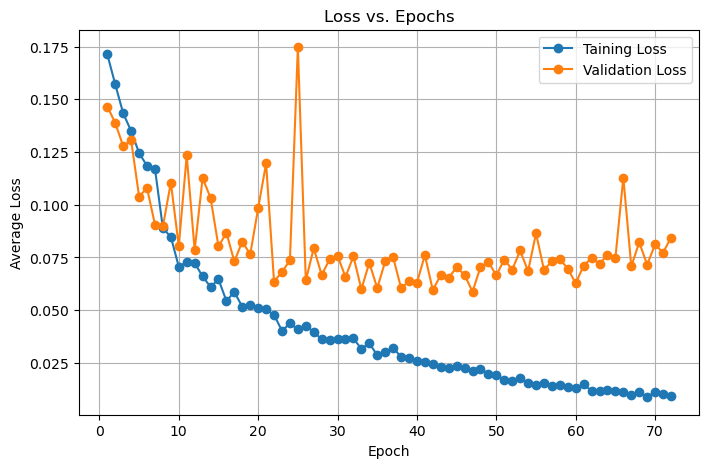

Loading best model...
Loading model with weighted average: False
Flattened feature size: 14080
Number of x_cam bins: 161
Number of y_cam bins: 91
Number of R_cam bins: 101
Number of in_fov bins: 1
Best model evaluation...
Evaluating video classification tracker


c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\network.py:2025: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)


Average Error for x_cam: 6.0340 pixels
Average Error for y_cam: 1.4857 pixels
Average Error for R_cam: 1.0097 pixels
Average Error for in_fov: 0.4984 pixels
Best model error: 6.3154338002995605
Model saved at models/VideoClassification_q8_5ts_47e.pt
--------------------------------------------------


In [72]:
dataset_path = 'dataset_python_sim'
accumulation_time = 10 # ms
quantization = 8
batch_size = 4
dataset_type = 'all'
labels = ['x_cam', 'y_cam', 'R_cam', 'in_fov']
trainset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, quantization = quantization, split='train', dataset_type=dataset_type, augment=True, labels=labels)
testset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, quantization = quantization, split='test', dataset_type=dataset_type, labels=labels)
validationset = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, quantization = quantization, split='val', dataset_type=dataset_type, labels=labels)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0, collate_fn=trainset.collate_fn)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=testset.collate_fn)
valid_loader = DataLoader(validationset, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=validationset.collate_fn)

num_steps = 5

print(f"Training with num_steps={num_steps}")
model = network.SCNNVideoClassification(trainset, learn_threshold=True).to(device)
base_lr = 3e-4                       # LR for “regular” weights
conf_lr = 5 * base_lr                # LR for the confidence head

layer_name = 'in_fov'  # specify the layer you want to freeze
# 1. Collect the parameters of the confidence head
conf_params   = list(model.fc_layers[layer_name].parameters())

# 2. Everything else goes in another group
other_params  = [p for n, p in model.named_parameters()
                if not n.startswith('fc_layers.in_fov')]

network.freeze_given(model, layer_name)


# 3. Create the optimizer with two groups
optimizer = torch.optim.AdamW(
    other_params,
    lr=base_lr,           # adjust if your base LR is different
    weight_decay=1e-4   # usually not needed for 1-layer heads
)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.5,
    patience=3,
    threshold=1e-4,
    threshold_mode='rel',
    cooldown=1,
    min_lr=1e-7,
    verbose=True
)
loss_fn = network.classification_loss_without_confidence
model.name += "_without_confidence_dropout"
model.start_training(trainloader, optimizer, device, loss_function=loss_fn, validationloader=valid_loader, num_steps=num_steps, num_epochs=75, chunk_size=40, grad_clip=True)#, scheduler=scheduler)
network.save_best_model(network.SCNNVideoClassification, testloader, device)
print("-" * 50)


# Training better versions of the model

I am trying to make better this version:

(models/VideoClassification-all_lt_aug_q8_10ts_30e.pt)

Loading dataset from dataset_python_sim with accumulation time 10ms
Loaded 20632 rows from dataset_python_sim/positions_in_fov_10ms.csv
Found 156 sequences in dataset_python_sim/positions_in_fov_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Number of label fields: 3
Split sizes: train=109, val=23, test=24, total=156
Final dataset split='train' size: 109

Loading dataset from dataset_python_sim with accumulation time 10ms
Loaded 20632 rows from dataset_python_sim/positions_in_fov_10ms.csv
Found 156 sequences in dataset_python_sim/positions_in_fov_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Number of label fields: 3
Split sizes: train=109, val=23, test=24, total=156
Final dataset split='test' size: 24

Loading dataset from dataset_python_sim with accumulation time 10ms
Loaded 20632 rows from dataset_python_sim/positions_in_fov_10ms.csv
Found 156 sequences in dataset_python_sim/positions_in_fov_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Number of label fiel

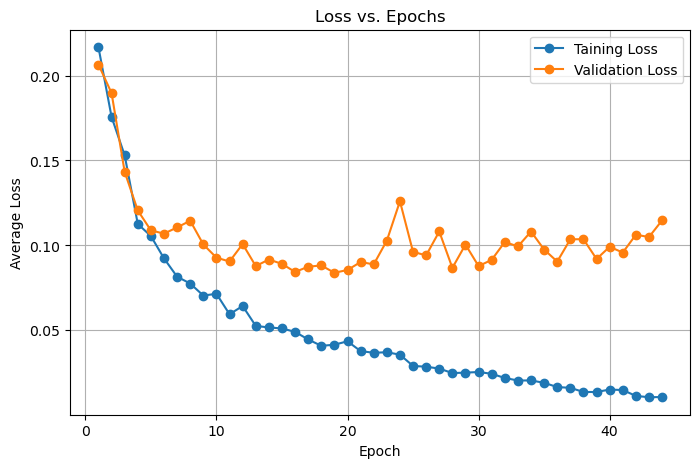

Loading best model...
Loading model with weighted average: False
Flattened feature size: 14080
Number of x_cam bins: 161
Number of y_cam bins: 91
Number of R_cam bins: 101
Best model evaluation...
Evaluating video classification tracker


c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\network.py:2026: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)


Average Error for x_cam: 2.2959 pixels
Average Error for y_cam: 1.2436 pixels
Average Error for R_cam: 0.7662 pixels
Best model error: 2.7211964992826805
Model saved at models/VideoClassification_q8_10ts_19e.pt


In [ ]:
dataset_path = 'dataset_python_sim'
accumulation_time = 10 # ms
quantization = 8
batch_size = 4
dataset_type = 'all'
new_positions_csv = f'dataset_python_sim/positions_in_fov_{accumulation_time}ms.csv'
trainset_in = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, positions_csv=new_positions_csv, quantization = quantization, split='train', dataset_type=dataset_type, augment=True)
testset_in = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, positions_csv=new_positions_csv, quantization = quantization, split='test', dataset_type=dataset_type)
validationset_in = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, positions_csv=new_positions_csv, quantization = quantization, split='val', dataset_type=dataset_type)
trainloader_in = DataLoader(trainset_in, batch_size=batch_size, shuffle=True, num_workers=0, collate_fn=trainset_in.collate_fn)
testloader_in = DataLoader(testset_in, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=testset_in.collate_fn)
valid_loader_in = DataLoader(validationset_in, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=validationset_in.collate_fn)



model = network.SCNNVideoClassification(trainset_in, weighted_avg=False, learn_threshold=True).to(device)
model.name += f'-{dataset_type}_aug_lt'
optimizer = optim.AdamW(model.parameters(), lr=5e-4, weight_decay=1e-3)
num_epochs = 50
length_train = len(trainloader_in)

# def lr_lambda(step):
#     warmup_steps = 2 * length_train          # 1 epoch
#     return min(1.0, step / warmup_steps)

# warmup = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda)

# scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
#                 optimizer,
#                 T_max = num_epochs*len(trainloader_in),  # full schedule
#                 eta_min = 1e-5)
loss_function = network.classification_loss
model.start_training(trainloader_in, optimizer, device, loss_function=loss_function, validationloader=testloader_in, num_steps=10, num_epochs=num_epochs, chunk_size=30) # I AM TRAINING ON THE TESTLOADER FOR FASTER TRAINING

network.save_best_model(network.SCNNVideoClassification, testloader_in, device, evaluate=True)


In [3]:
model.evaluate(testloader_in, device, num_steps=10, print_results=True, weighted_avg=False)

Evaluating video classification tracker
Average Error for x_cam: 7.6213 pixels
Average Error for y_cam: 1.2861 pixels
Average Error for R_cam: 0.8719 pixels


array([7.62131837, 1.28611501, 0.87190276])

In [4]:
model = network.load_model('models/best_model_current_training.pt', network.SCNNVideoClassification, testset_in, device)

c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\network.py:2026: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)


Loading model with weighted average: False
Flattened feature size: 14080
Number of x_cam bins: 161
Number of y_cam bins: 91
Number of R_cam bins: 101


In [6]:
error = model.evaluate(testloader_in, device, num_steps=10, print_results=True)
print(np.linalg.norm(error))

Evaluating video classification tracker
Average Error for x_cam: 2.2959 pixels
Average Error for y_cam: 1.2436 pixels
Average Error for R_cam: 0.7662 pixels
2.7211964992826805


In [8]:
error = model.evaluate(valid_loader_in, device, num_steps=10, print_results=True)
print(np.linalg.norm(error))

Evaluating video classification tracker
Average Error for x_cam: 1.5479 pixels
Average Error for y_cam: 0.8024 pixels
Average Error for R_cam: 0.4462 pixels
1.7997385858529142


In [9]:
error = model.evaluate(trainloader_in, device, num_steps=10, print_results=True)
print(np.linalg.norm(error))

Evaluating video classification tracker
Average Error for x_cam: 0.5179 pixels
Average Error for y_cam: 0.4311 pixels
Average Error for R_cam: 0.1749 pixels
0.6961865619492101


In [10]:
network.save_best_model(network.SCNNVideoClassification, valid_loader_in, device, evaluate=True)

Loading best model...
Loading model with weighted average: False
Flattened feature size: 14080
Number of x_cam bins: 161
Number of y_cam bins: 91
Number of R_cam bins: 101
Best model evaluation...
Evaluating video classification tracker


c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\network.py:2026: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)


Average Error for x_cam: 1.5479 pixels
Average Error for y_cam: 0.8024 pixels
Average Error for R_cam: 0.4462 pixels
Best model error: 1.7997385858529142
Model saved at models/VideoClassification_q8_10ts_19e.pt


In [2]:
dataset_path = 'dataset_python_sim'
accumulation_time = 10 # ms
quantization = 8
batch_size = 4
dataset_type = 'all'
new_positions_csv = f'dataset_python_sim/positions_in_fov_{accumulation_time}ms.csv'
trainset_in = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, positions_csv=new_positions_csv, quantization = quantization, split='train', dataset_type=dataset_type, augment=True)
testset_in = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, positions_csv=new_positions_csv, quantization = quantization, split='test', dataset_type=dataset_type)
validationset_in = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, positions_csv=new_positions_csv, quantization = quantization, split='val', dataset_type=dataset_type)
trainloader_in = DataLoader(trainset_in, batch_size=batch_size, shuffle=True, num_workers=0, collate_fn=trainset_in.collate_fn)
testloader_in = DataLoader(testset_in, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=testset_in.collate_fn)
valid_loader_in = DataLoader(validationset_in, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=validationset_in.collate_fn)



model = network.SCNNVideoClassification(trainset_in, weighted_avg=False, learn_threshold=True).to(device)
model.name += f'-{dataset_type}_aug_lt'

decay, no_decay = [], []
for n, p in model.named_parameters():
    if p.ndim >= 2:              # weights of conv & linear layers
        decay.append(p)
    else:                        # biases, thresholds, BN scales
        no_decay.append(p)

optimizer = torch.optim.AdamW(
    [
        {"params": decay,     "weight_decay": 1e-3},   # or 5e-4
        {"params": no_decay,  "weight_decay": 0.0}
    ],
    lr=5e-4, betas=(0.9,0.999), fused=True
)
num_epochs = 50
length_train = len(trainloader_in)

# def lr_lambda(step):
#     warmup_steps = 2 * length_train          # 1 epoch
#     return min(1.0, step / warmup_steps)

# warmup = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda)

# scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
#                 optimizer,
#                 T_max = num_epochs*len(trainloader_in),  # full schedule
#                 eta_min = 1e-5)
loss_function = network.classification_loss
model.start_training(trainloader_in, optimizer, device, loss_function=loss_function, validationloader=testloader_in, num_steps=10, num_epochs=num_epochs, chunk_size=30) # I AM TRAINING ON THE TESTLOADER FOR FASTER TRAINING

network.save_best_model(network.SCNNVideoClassification, testloader_in, device, evaluate=True)

Loading dataset from dataset_python_sim with accumulation time 10ms
Loaded 20632 rows from dataset_python_sim/positions_in_fov_10ms.csv
Found 156 sequences in dataset_python_sim/positions_in_fov_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Number of label fields: 3
Split sizes: train=109, val=23, test=24, total=156
Final dataset split='train' size: 109

Loading dataset from dataset_python_sim with accumulation time 10ms
Loaded 20632 rows from dataset_python_sim/positions_in_fov_10ms.csv
Found 156 sequences in dataset_python_sim/positions_in_fov_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Number of label fields: 3
Split sizes: train=109, val=23, test=24, total=156
Final dataset split='test' size: 24

Loading dataset from dataset_python_sim with accumulation time 10ms
Loaded 20632 rows from dataset_python_sim/positions_in_fov_10ms.csv
Found 156 sequences in dataset_python_sim/positions_in_fov_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Number of label fiel

KeyboardInterrupt: 

I ADDED LABEL SMOOTHING, REMEMBER TO TAKE IT OUT LATER

Loading dataset from dataset_python_sim with accumulation time 10ms
Loaded 20632 rows from dataset_python_sim/positions_in_fov_10ms.csv
Found 156 sequences in dataset_python_sim/positions_in_fov_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Number of label fields: 3
Split sizes: train=109, val=23, test=24, total=156
Final dataset split='train' size: 109

Loading dataset from dataset_python_sim with accumulation time 10ms
Loaded 20632 rows from dataset_python_sim/positions_in_fov_10ms.csv
Found 156 sequences in dataset_python_sim/positions_in_fov_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Number of label fields: 3
Split sizes: train=109, val=23, test=24, total=156
Final dataset split='test' size: 24

Loading dataset from dataset_python_sim with accumulation time 10ms
Loaded 20632 rows from dataset_python_sim/positions_in_fov_10ms.csv
Found 156 sequences in dataset_python_sim/positions_in_fov_10ms.csv
Shape of the images: torch.Size([2, 90, 160])
Number of label fiel

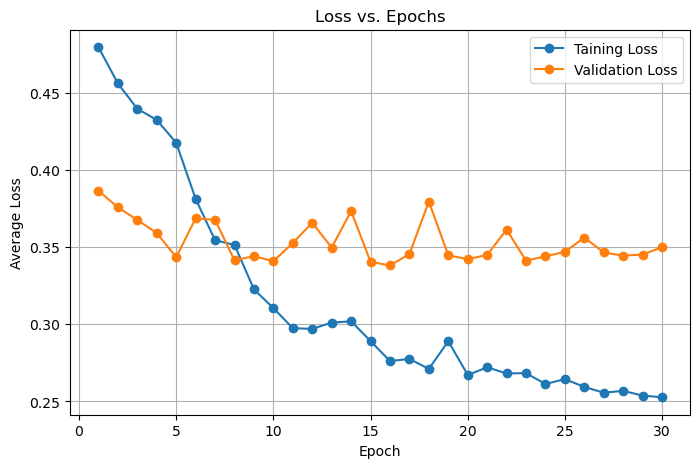

Loading best model...
Loading model with weighted average: False
Flattened feature size: 14080
Number of x_cam bins: 161
Number of y_cam bins: 91
Number of R_cam bins: 101
Best model evaluation...
Evaluating video classification tracker


c:\Users\realenriquem\OneDrive - Sioux Group B.V\Documents\Git\BallTrackingSNN\network.py:2035: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)


Average Error for x_cam: 11.5328 pixels
Average Error for y_cam: 4.1724 pixels
Average Error for R_cam: 1.2817 pixels
Best model error: 12.331114103345508
Model saved at models/VideoClassification_q8_10ts_16e.pt
Training with num_steps=2
Flattened feature size: 14080
Number of x_cam bins: 161
Number of y_cam bins: 91
Number of R_cam bins: 101
Epoch 1/30, Training Loss: 0.4887, Validation Loss: 0.3902 pixels
Model saved at models/best_model_current_training.pt
Epoch 2/30, Training Loss: 0.4798, Validation Loss: 0.3651 pixels
Model saved at models/best_model_current_training.pt
Epoch 3/30, Training Loss: 0.4401, Validation Loss: 0.3663 pixels
Epoch 4/30, Training Loss: 0.4325, Validation Loss: 0.3595 pixels
Model saved at models/best_model_current_training.pt
Epoch 5/30, Training Loss: 0.4184, Validation Loss: 0.3522 pixels
Model saved at models/best_model_current_training.pt
Epoch 6/30, Training Loss: 0.3841, Validation Loss: 0.3477 pixels
Model saved at models/best_model_current_traini

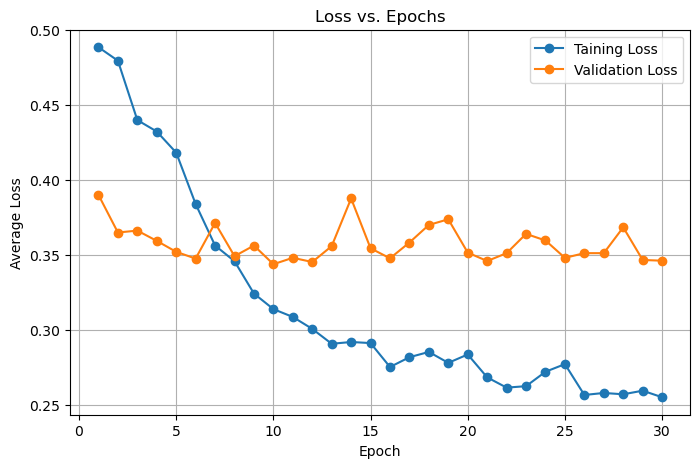

Loading best model...
Loading model with weighted average: False
Flattened feature size: 14080
Number of x_cam bins: 161
Number of y_cam bins: 91
Number of R_cam bins: 101
Best model evaluation...
Evaluating video classification tracker
Average Error for x_cam: 15.3266 pixels
Average Error for y_cam: 3.3207 pixels
Average Error for R_cam: 1.5803 pixels
Best model error: 15.761588032705426
Model saved at models/VideoClassification_q8_10ts_10e.pt
Training with num_steps=5
Flattened feature size: 14080
Number of x_cam bins: 161
Number of y_cam bins: 91
Number of R_cam bins: 101
Epoch 1/30, Training Loss: 0.4907, Validation Loss: 0.3782 pixels
Model saved at models/best_model_current_training.pt
Epoch 2/30, Training Loss: 0.4553, Validation Loss: 0.3702 pixels
Model saved at models/best_model_current_training.pt
Epoch 3/30, Training Loss: 0.4373, Validation Loss: 0.3762 pixels
Epoch 4/30, Training Loss: 0.4349, Validation Loss: 0.3565 pixels
Model saved at models/best_model_current_trainin

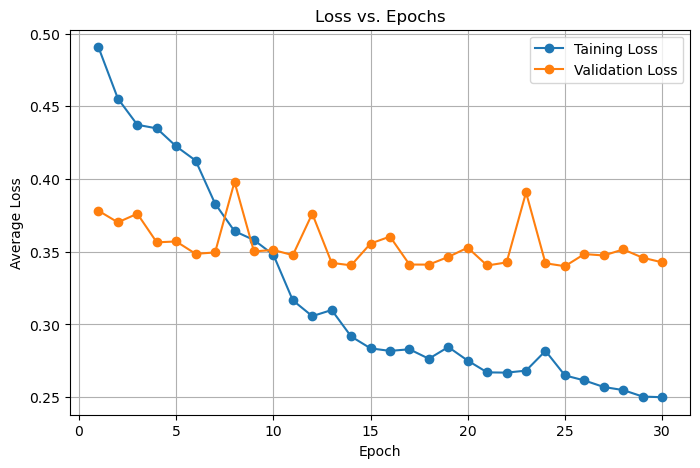

Loading best model...
Loading model with weighted average: False
Flattened feature size: 14080
Number of x_cam bins: 161
Number of y_cam bins: 91
Number of R_cam bins: 101
Best model evaluation...
Evaluating video classification tracker
Average Error for x_cam: 14.9079 pixels
Average Error for y_cam: 4.3666 pixels
Average Error for R_cam: 1.1166 pixels
Best model error: 15.574333675671056
Model saved at models/VideoClassification_q8_10ts_25e.pt
Training with num_steps=10
Flattened feature size: 14080
Number of x_cam bins: 161
Number of y_cam bins: 91
Number of R_cam bins: 101
Epoch 1/30, Training Loss: 0.4879, Validation Loss: 0.4079 pixels
Model saved at models/best_model_current_training.pt
Epoch 2/30, Training Loss: 0.4738, Validation Loss: 0.3828 pixels
Model saved at models/best_model_current_training.pt
Epoch 3/30, Training Loss: 0.4439, Validation Loss: 0.3705 pixels
Model saved at models/best_model_current_training.pt
Epoch 4/30, Training Loss: 0.4334, Validation Loss: 0.3611 p

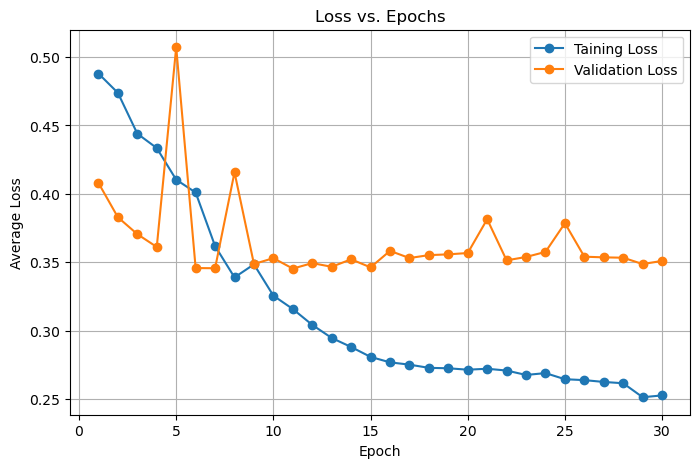

Loading best model...
Loading model with weighted average: False
Flattened feature size: 14080
Number of x_cam bins: 161
Number of y_cam bins: 91
Number of R_cam bins: 101
Best model evaluation...
Evaluating video classification tracker
Average Error for x_cam: 20.3121 pixels
Average Error for y_cam: 3.8707 pixels
Average Error for R_cam: 1.3003 pixels
Best model error: 20.71842852962593
Model saved at models/VideoClassification_q8_10ts_11e.pt


In [ ]:
dataset_path = 'dataset_python_sim'
accumulation_time = 10 # ms
quantization = 8
batch_size = 4
dataset_type = 'all'
new_positions_csv = f'dataset_python_sim/positions_in_fov_{accumulation_time}ms.csv'
trainset_in = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, positions_csv=new_positions_csv, quantization = quantization, split='train', dataset_type=dataset_type, augment=True)
testset_in = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, positions_csv=new_positions_csv, quantization = quantization, split='test', dataset_type=dataset_type)
validationset_in = dt.Tracking3DVideoDataset(dataset_path, accumulation_time, positions_csv=new_positions_csv, quantization = quantization, split='val', dataset_type=dataset_type)
trainloader_in = DataLoader(trainset_in, batch_size=batch_size, shuffle=True, num_workers=0, collate_fn=trainset_in.collate_fn)
testloader_in = DataLoader(testset_in, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=testset_in.collate_fn)
valid_loader_in = DataLoader(validationset_in, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=validationset_in.collate_fn)


timesteps = [1, 2, 5, 10]
for num_steps in timesteps:
    print(f"Training with num_steps={num_steps}")
    model = network.SCNNVideoClassification(trainset_in, weighted_avg=False, learn_threshold=True).to(device)
    model.ordinal = False
    model.name += f'-{dataset_type}_aug_lt'
    optimizer = optim.AdamW(model.parameters(), lr=5e-4, weight_decay=1e-3)
    num_epochs = 30

    # def lr_lambda(step):
    #     warmup_steps = 2 * length_train          # 1 epoch
    #     return min(1.0, step / warmup_steps)

    # warmup = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda)

    # scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
    #                 optimizer,
    #                 T_max = num_epochs*len(trainloader_in),  # full schedule
    #                 eta_min = 1e-5)
    loss_function = network.classification_loss
    model.start_training(trainloader_in, optimizer, device, loss_function=loss_function, validationloader=valid_loader_in, num_steps=num_steps, num_epochs=num_epochs, chunk_size=20) # I AM TRAINING ON THE TESTLOADER FOR FASTER TRAINING
    network.save_best_model(network.SCNNVideoClassification, valid_loader_in, device, evaluate=True)